# Plots degli attributi

1. Per ogni attributo categorico sarà plottato un grafico a barre.
2. Per ogni attributo numerico sarà plottato un istogramma ed un boxplot
3. Alcuni attributi categorici saranno esclusi perchè la distribuzione non risulta essere interessante
4. Per gli attributi numerici i valori string sono trasformati in missing value
5. Tutti i missing value non vengono plottati <br>
Anche se molti grafici risulteranno essere poco espressivi, non è importante in quanto si tratta solo di grafici pre-data cleaning, che serviranno appunto per eseguire al meglio quest'operazione
### Sul data set post-datacleaning, verrà rieseguito questo notebook per esaminare nuovamente le distribuzioni

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data=pd.read_csv("../../data/incidents.csv", parse_dates=["date"], low_memory=False)
color = "#6200EE"
edgecolor= "#03DAC5"

### Date
Nell'attributo in questione non sono presenti valori non corrispondenti ad effetive date, per avere un plot interessante, viene stampato il grafico a barre della distribuzione delle date degli incidenti, raggruppati per anno e per mese dell'anno e giorno della settimana.

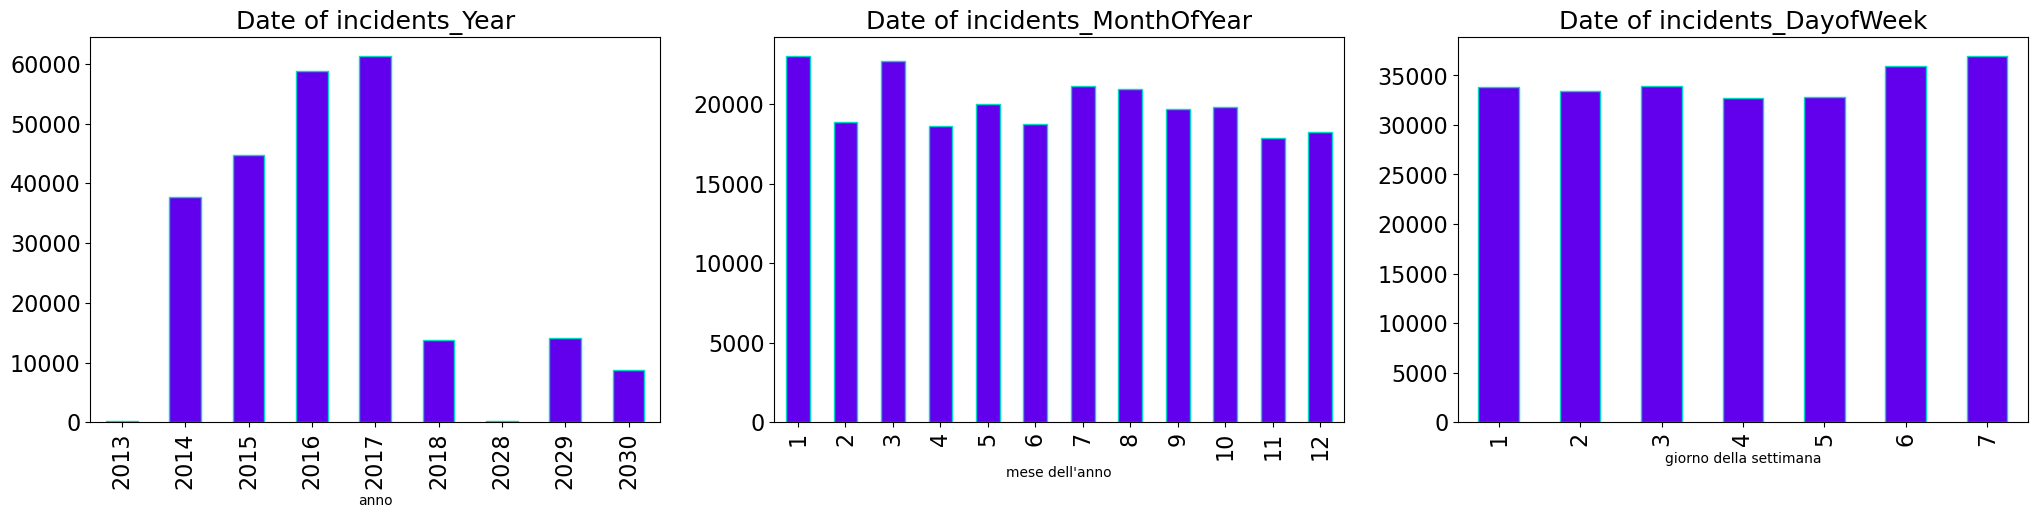

In [6]:
dateYear=data["date"].apply(lambda x: x.year)
dateMonth = data["date"].apply(lambda x: x.month)
dateDay = data["date"].apply(lambda x: x.weekday() + 1)
dateYear= dateYear.value_counts().sort_index()
dateMonth= dateMonth.value_counts().sort_index()
dateDay= dateDay.value_counts().sort_index()

dim=(1,3)
plt.figure(figsize=(25,5))

plt.subplot2grid(dim,(0,0))
dateYear.plot(kind="bar",title="Date of incidents_Year", color=color, edgecolor=edgecolor,fontsize=16, xlabel= "anno").title.set_size(18)

plt.subplot2grid(dim,(0,1))
dateMonth.plot(kind="bar",title="Date of incidents_MonthOfYear", color=color, edgecolor=edgecolor,fontsize=16,xlabel = "mese dell'anno").title.set_size(18)

#monday == "1"
plt.subplot2grid(dim,(0,2))
dateDay.plot(kind="bar",title="Date of incidents_DayofWeek", color=color, edgecolor=edgecolor,fontsize=16, xlabel="giorno della settimana").title.set_size(18)

### State
dato di tipo categorico, plottiamo la distribuzione.
District of columbia non è uno stato ma è una regione autonoma quindi non viene droppata.


Illinois                17556
California              16306
Florida                 15029
Texas                   13577
Ohio                    10244
New York                 9712
Pennsylvania             8929
Georgia                  8925
North Carolina           8739
Louisiana                8103
Tennessee                7626
South Carolina           6939
Missouri                 6631
Michigan                 6136
Massachusetts            5981
Virginia                 5949
Indiana                  5852
Maryland                 5798
Alabama                  5471
New Jersey               5387
Wisconsin                4787
Kentucky                 4157
Mississippi              3599
Oklahoma                 3455
Washington               3434
Colorado                 3201
District of Columbia     3195
Connecticut              3067
Arkansas                 2842
Iowa                     2517
Minnesota                2408
Arizona                  2328
Oregon                   2286
Kansas    

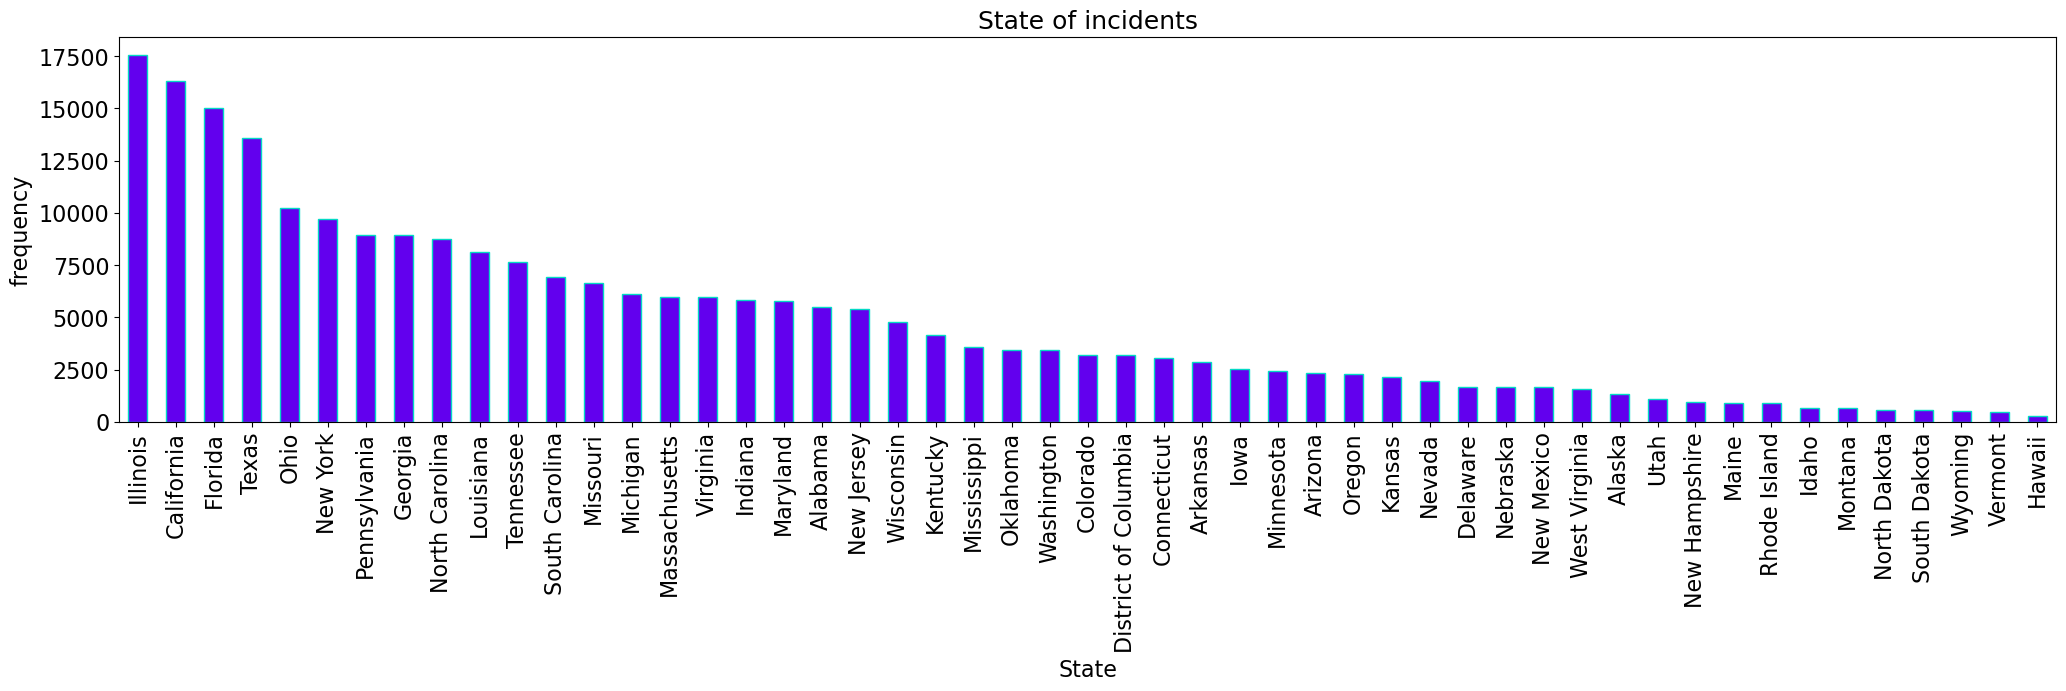

In [7]:
state=data["state"].value_counts()

plt.figure(figsize=(25,5))
ax=state.plot(kind="bar",title="State of incidents", color=color, edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_ylabel("frequency",fontsize= 16)
ax.set_xlabel("State",fontsize=16)
print(state)

### Latitude and Longitude
Gli attributi state, city_or_county, address, congressional_district, state_house_district e state_senate_district si possono inferire dalla coppia (latitude, longitude) quindi per la distribuzione, basta plottare lo scatter della coppia..

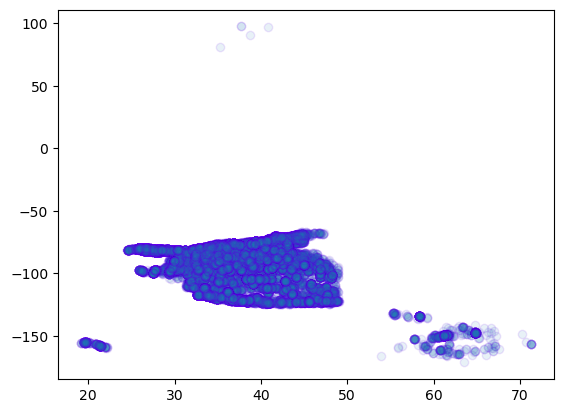

In [8]:
a=plt.scatter(data["latitude"],data["longitude"],alpha = 0.1, edgecolors=color)
plt.show()


#### Luogo dell'incidente
Il luogo dell'incidente viene individuato attraverso la coppia <latitude, longitude>

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Carica la mappa del North America
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
usa = world[world.continent == "North America"]

gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

fig, ax = plt.subplots(figsize=(30, 30))

# Disegna la mappa degli Stati Uniti
usa.plot(ax=ax, color='white', edgecolor='black')

gdf.plot(ax=ax, marker='o', color='red', markersize=0.01)
plt.show()


ModuleNotFoundError: No module named 'geopandas'

### participant_age1
Random partecipant's age, non sono presenti stringhe 

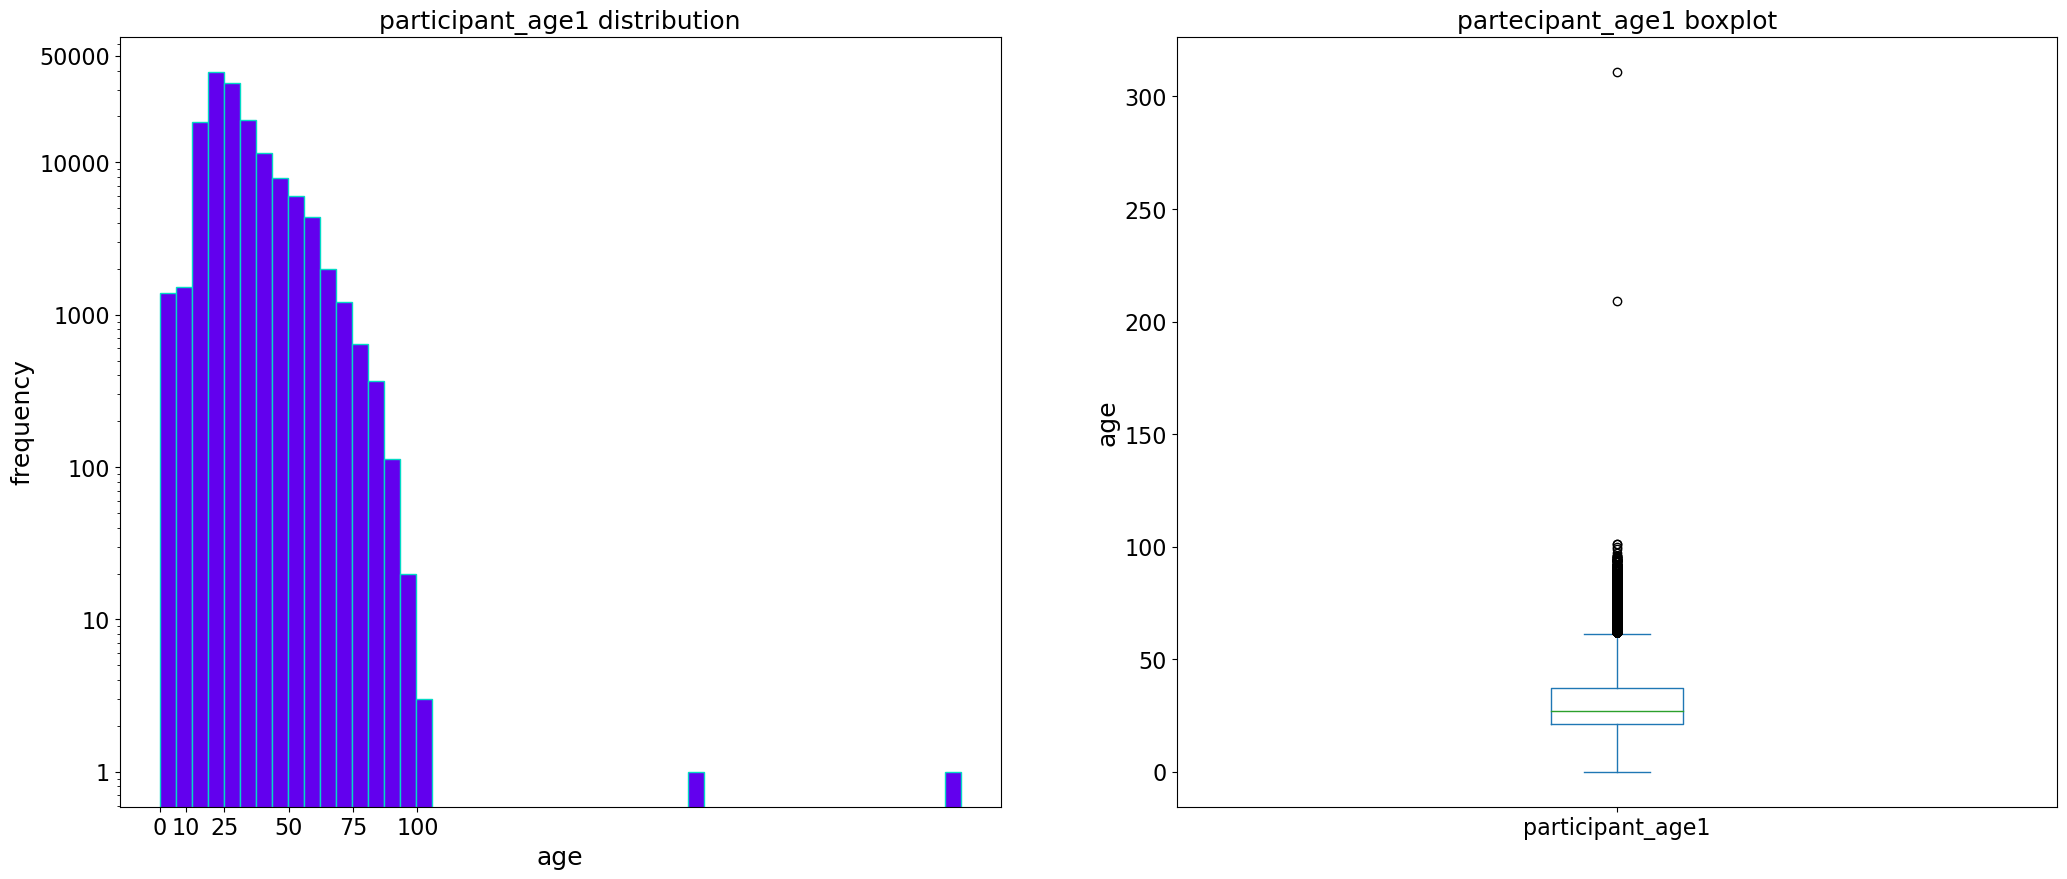

In [14]:
dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=data["participant_age1"].plot(bins=50,kind="hist",title="participant_age1 distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
#.set_xscale("log")
ax.set_yticks([1,10,100,1000,10000,50000])
ax.set_yticklabels([1,10,100,1000,10000,50000])
ax.set_xticks([0,10,25,50,75,100])
ax.set_xticklabels([0,10,25,50,75,100])
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("age",fontsize=18)

plt.subplot2grid(dim,(0,1))
ax2 = data["participant_age1"].plot(kind="box",fontsize=16)
ax2.set_title("partecipant_age1 boxplot")
ax2.title.set_size(18)
ax2.set_ylabel("age", fontsize=18)


plt.show()

### participant_age_group1
Random partecipant age group, non sono presenti valori oltre quelli rappresentati

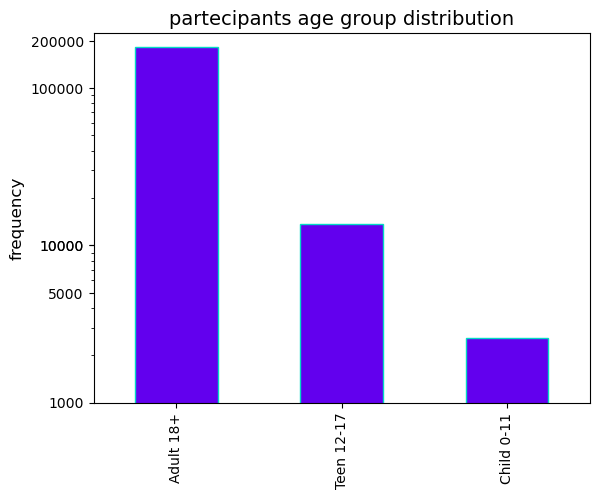

In [15]:
ageGroup= data["participant_age_group1"].value_counts()
ax=ageGroup.plot(kind="bar", color=color,edgecolor=edgecolor,fontsize=10,title="partecipants age group distribution")
ax.title.set_size(14)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=12)
ax.set_yticks([1000,5000,10000,10000,100000,200000])
ax.set_yticklabels([1000,5000,10000,10000,100000,200000])
plt.show()

### participant_gender1
Attributo binario, è presente unica istanza dell'attributo con valore "Male, female".<br>
Dato che l'occorrenza è unica, il valore viene sostituito dalla moda ovvero "Male" **(moda)**; inoltre il fatto che semanticamente contenga entrambi i due valori possibili per l'attributo, separati da una virgola, fa supporre che ci sia prima stato un qualche tipo di errore, fatto dopo aver dato valore "Male" all'attributo in questione.<br>

Text(0, 0.5, 'frequency')

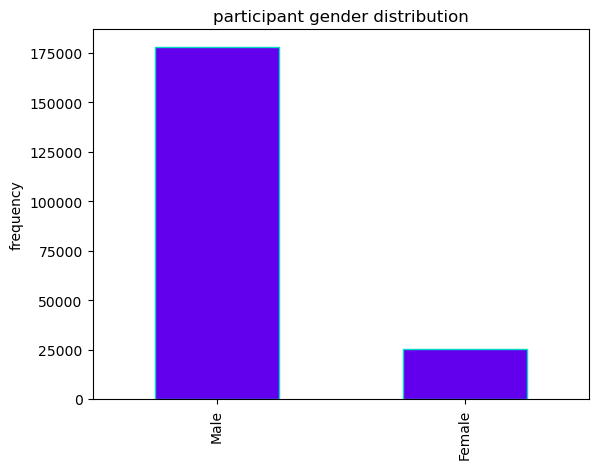

In [16]:
partGender=data["participant_gender1"]
partGender= partGender.replace("Male, female", "Male")
ax= partGender.value_counts().plot(kind="bar",stacked=False, color=color,edgecolor=edgecolor,fontsize=10,title="participant gender distribution")
ax.title.set_size(12)
ax.set_ylabel("frequency")

### min_age_participants
minimum age of the participants in the incident. Si tratta di un attributo numerico, perciò prima di plottare boxplot e distribution bisogna rimuovere tutti i valori non numerici.
Il box plot con scala logaritmica su asse delle y è molto utile dato che ci sono quasi 4000 valori di età maggiori di 120 anni.

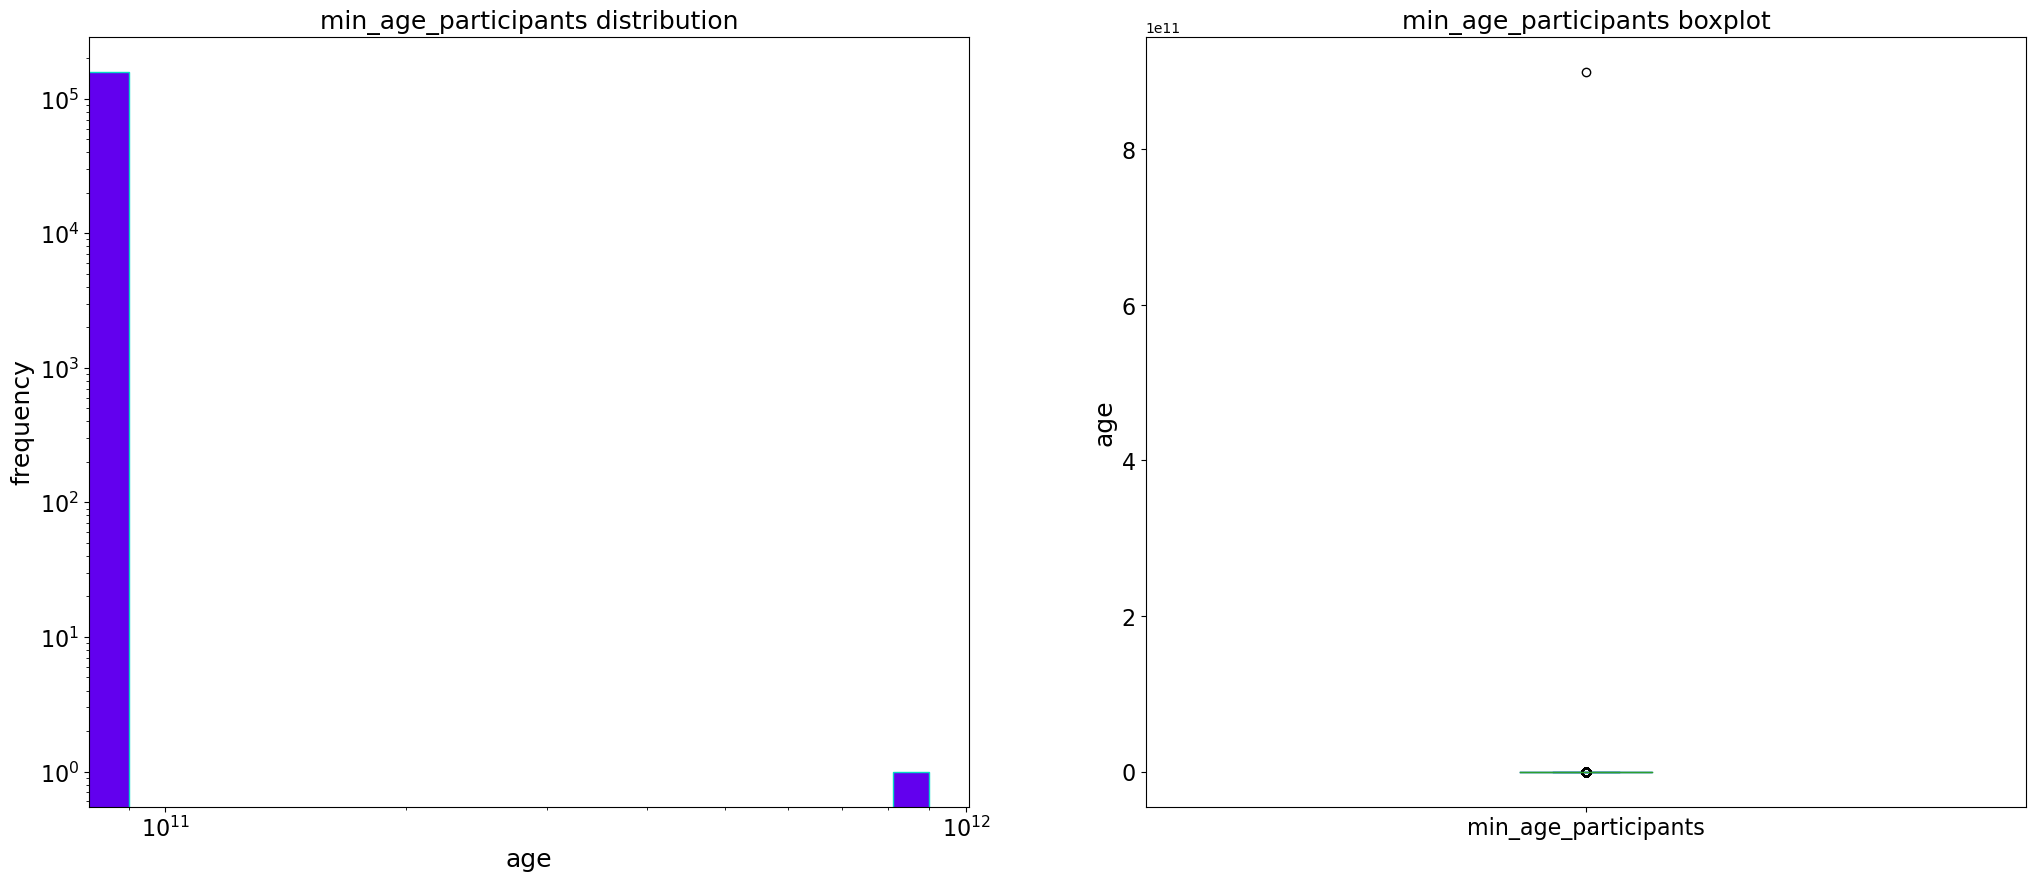

In [17]:
minAgePart= data["min_age_participants"]
minAgePart = pd.to_numeric(minAgePart, errors="coerce")

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=minAgePart.plot(kind="hist",title="min_age_participants distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("age",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=minAgePart.plot(kind="box",fontsize=16)
ax2.set_title("min_age_participants boxplot")
# ax2.set_yscale("log")
ax2.set_ylabel("age",fontsize=18)
ax2.title.set_size(18)


plt.show()

### avg_age_participants
average age of the participants in the incident. L'attributo va trattato in questa fase esattamente come il precedente.


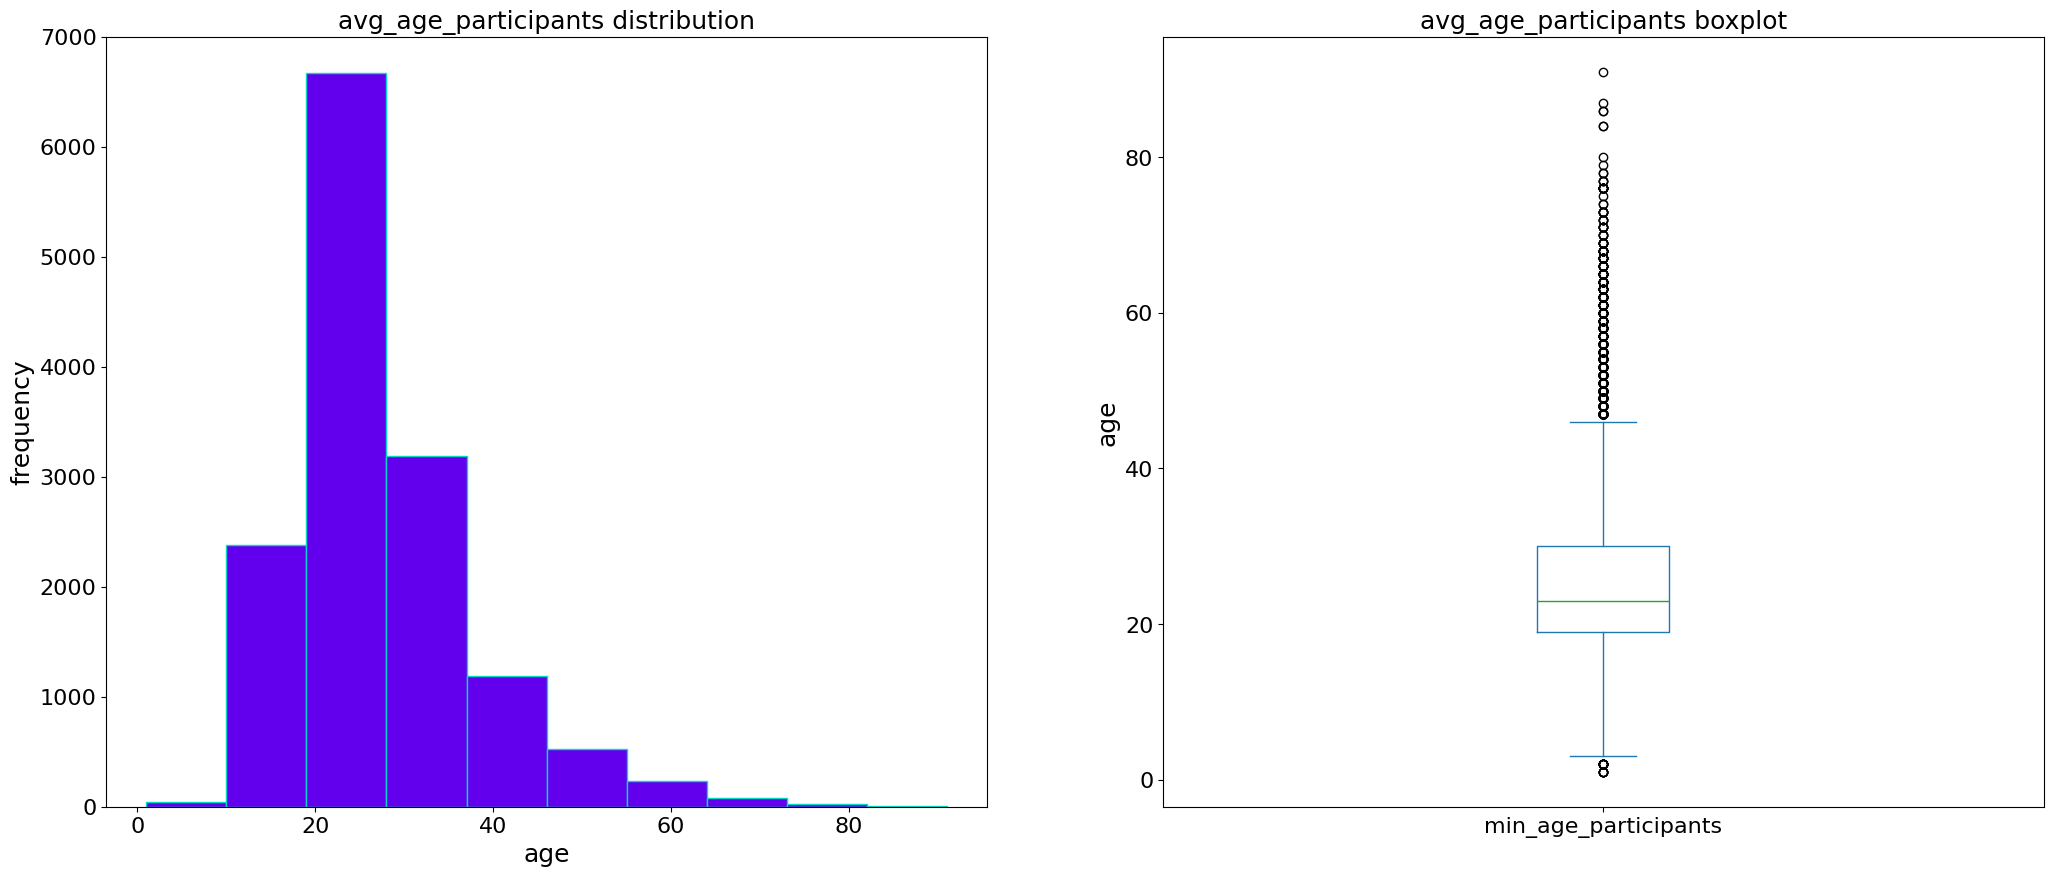

In [29]:
avgAgePart= data["avg_age_participants"]
avgAgePart = pd.to_numeric(avgAgePart, errors="coerce")

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=avgAgePart.plot(kind="hist",title="avg_age_participants distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("age",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=avgAgePart.plot(kind="box",fontsize=16)
ax2.set_title("avg_age_participants boxplot")
ax2.set_yscale("log")
ax2.set_ylabel("age",fontsize=18)
ax2.title.set_size(18)


plt.show()

### max_age_partecipants
maximum age of the participants in the incident. L'attributo va trattato in questa fase esattamente come il precedente.<br>
Ci sono circa 12k valori semanticamente scorretti.

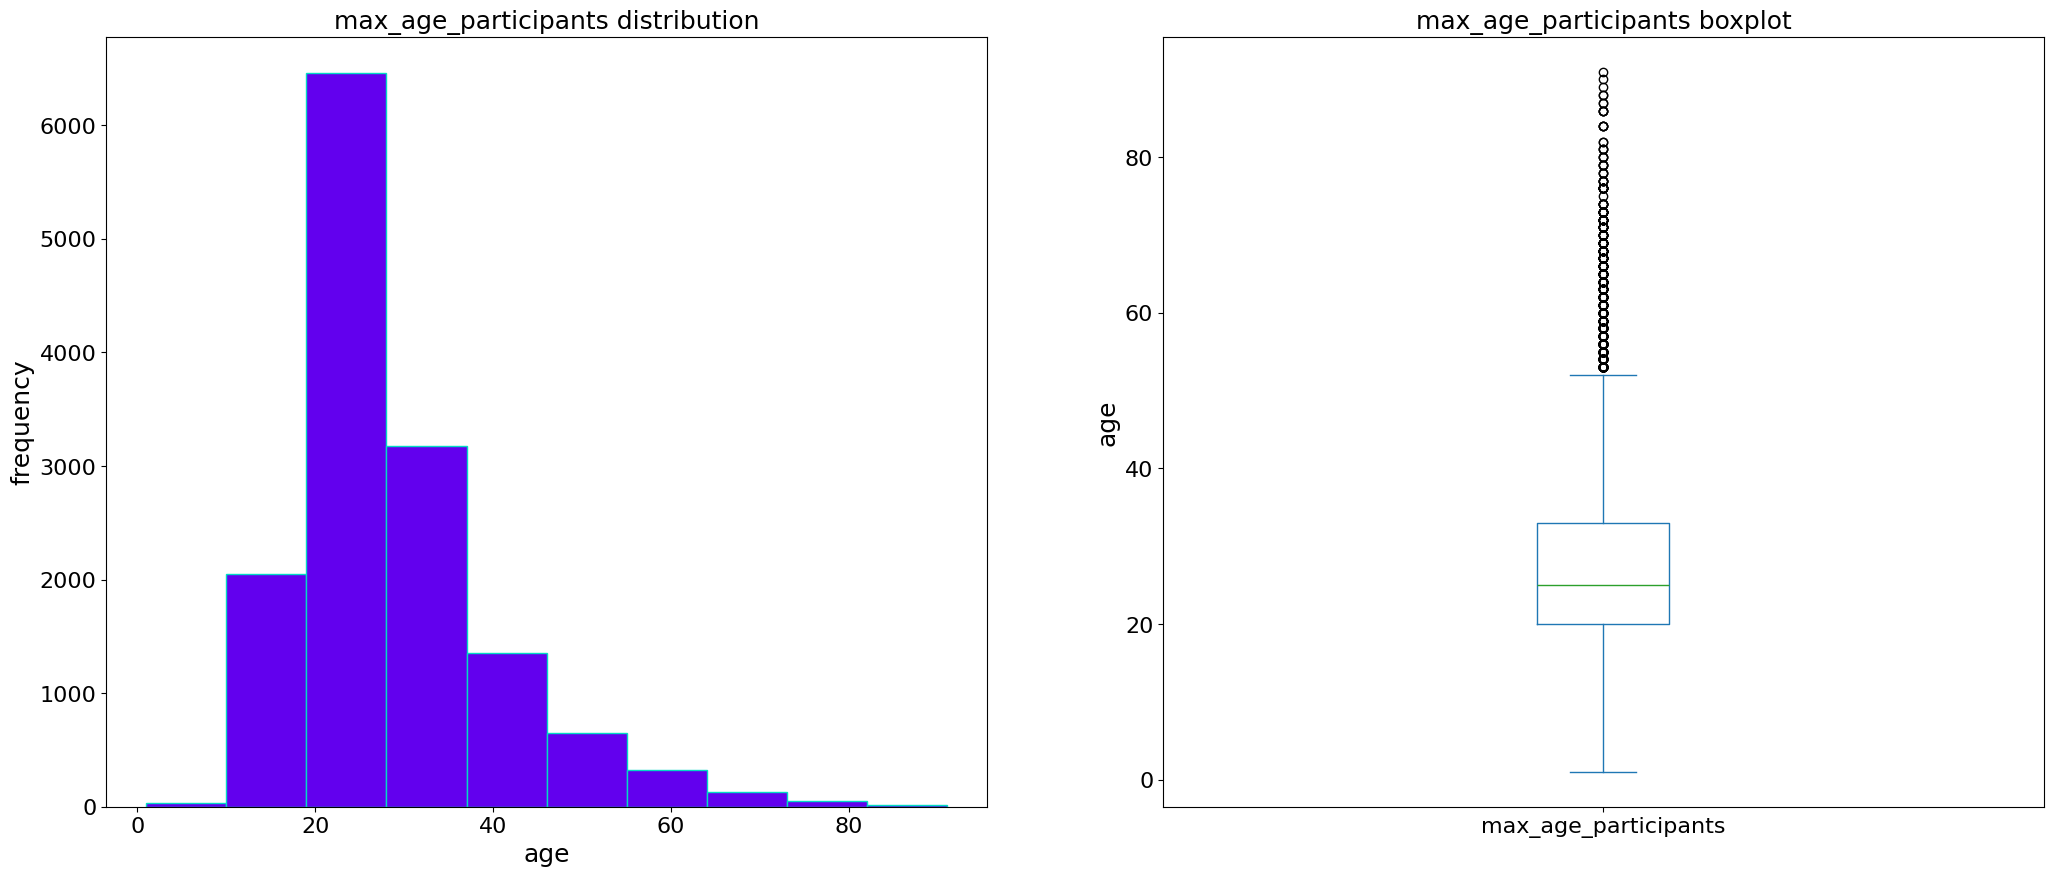

0


In [30]:
maxAgePart= data["max_age_participants"]
maxAgePart = pd.to_numeric(maxAgePart, errors="coerce")

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=maxAgePart.plot(kind="hist",title="max_age_participants distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("age",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=maxAgePart.plot(kind="box",fontsize=16)
ax2.set_title("max_age_participants boxplot")
ax2.set_yscale("log")
ax2.set_ylabel("age",fontsize=18)
ax2.title.set_size(18)


plt.show()
k=0
for age in maxAgePart:
    if age > 120 or age <0:
        k+=1
print(k)

### n_participants_child
number of child participants 0-11. L'attributo va trattato in questa fase esattamente come il precedente.
In questo caso abbiamo solo una decina di valori outliers, che possono essere rimossi tranquillamente in quanto in bassa quantità rispetto al numero di dati che abbiamo a disposozione. Per il momento non li rimuoviamo e ciò rende i grafici pressocche inutili a meno di suddividere l'istogramma in 200k bins.
Il box plot permette di individuare outliers.


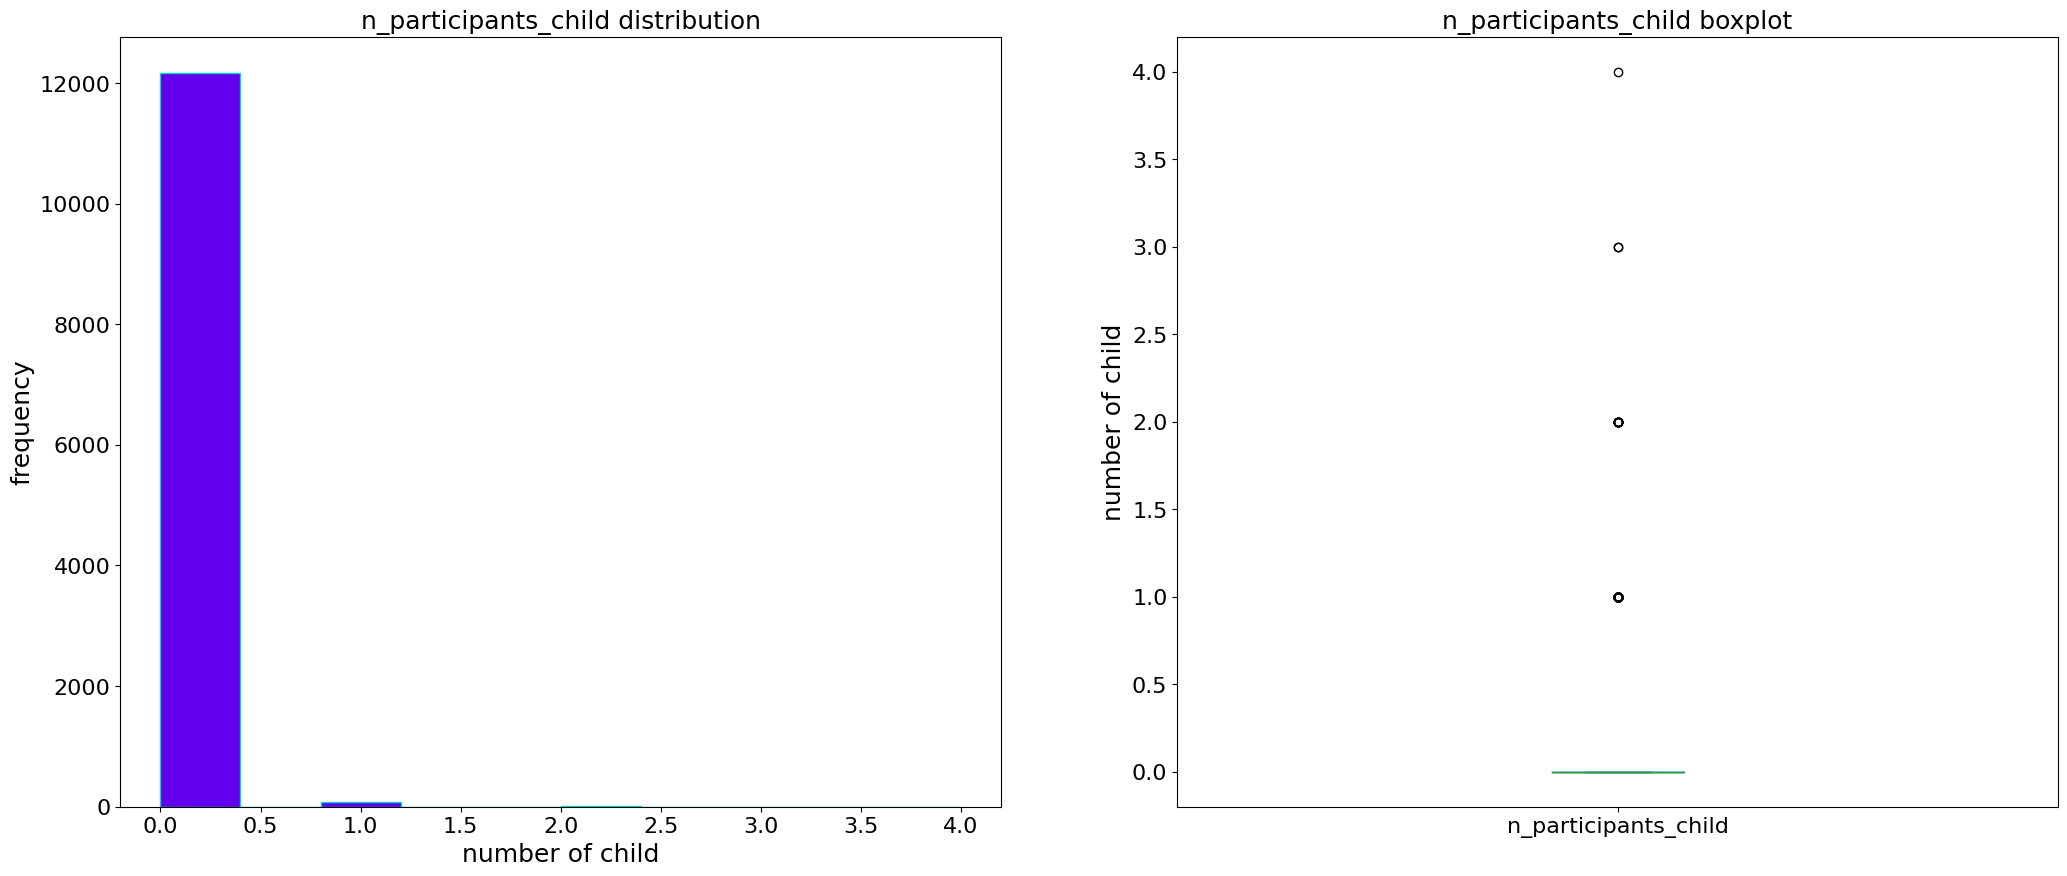

In [31]:
npartChild= data["n_participants_child"]
npartChild = pd.to_numeric(npartChild, errors="coerce")

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=npartChild.plot(kind="hist",title="n_participants_child distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of child",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=npartChild.plot(kind="box",fontsize=16)
ax2.set_title("n_participants_child boxplot")
ax2.set_yscale("log")
ax2.set_ylabel("number of child",fontsize=18)
ax2.title.set_size(18)


plt.show()


### n_participants_teen
number of teen participants 12-17. Valgono le cose scritte per l'attributo precedente.

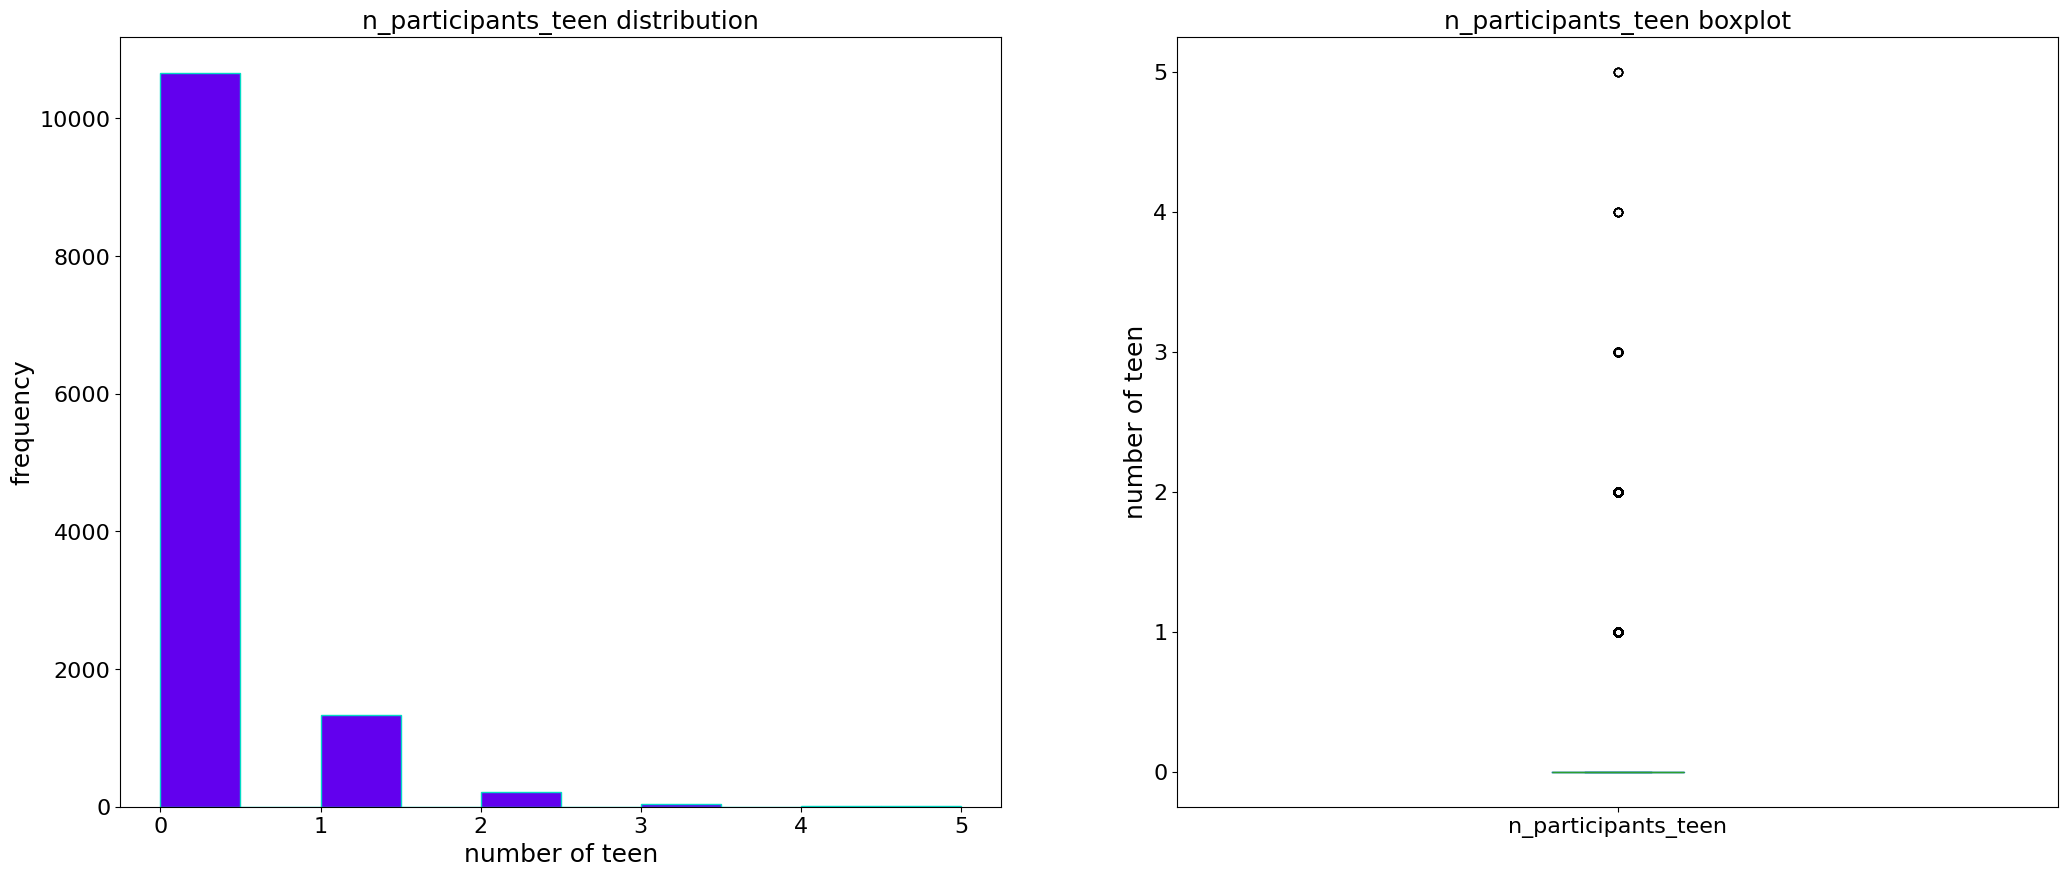

In [32]:
npartTeen= data["n_participants_teen"]
npartTeen = pd.to_numeric(npartTeen, errors="coerce")

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=npartTeen.plot(kind="hist",title= "n_participants_teen distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of teen",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=npartTeen.plot(kind="box",fontsize=16)
ax2.set_title("n_participants_teen boxplot")
ax2.set_yscale("log")
ax2.set_ylabel("number of teen",fontsize=18)
ax2.title.set_size(18)


plt.show()

### n_participants_adult
number of adult participants (18 +).  Valgono le cose scritte per l'attributo precedente. l'unico tra gli ultimi tre attributi per il quale ha senso il boxplot

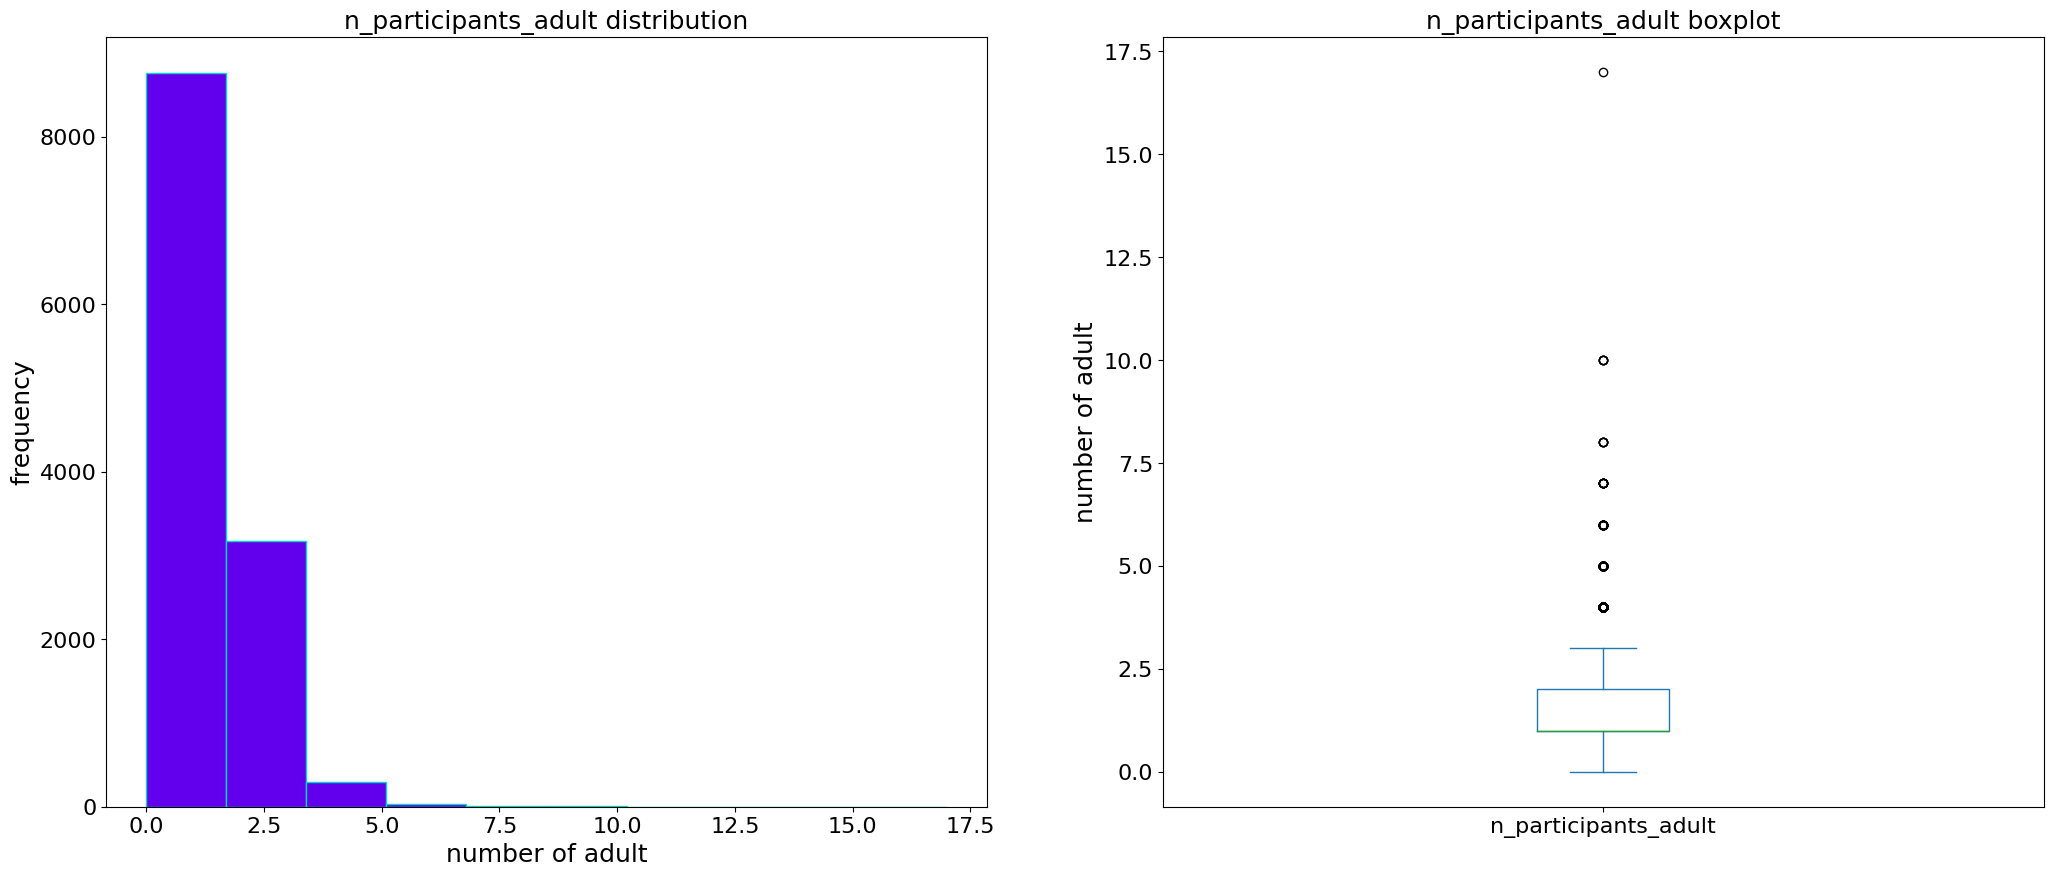

In [33]:
npartAdult= data["n_participants_adult"]
npartAdult = pd.to_numeric(npartAdult, errors="coerce")

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=npartAdult.plot(kind="hist",title= "n_participants_adult distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of adult",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=npartAdult.plot(kind="box",fontsize=16)
ax2.set_title("n_participants_adult boxplot")
ax2.set_yscale("log")
ax2.set_ylabel("number of adult",fontsize=18)
ax2.title.set_size(18)


plt.show()

### n_males.
number of males participants. Non sono presenti valori stringhe.

count    15780.000000
mean         1.481179
std          0.881732
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: n_males, dtype: float64


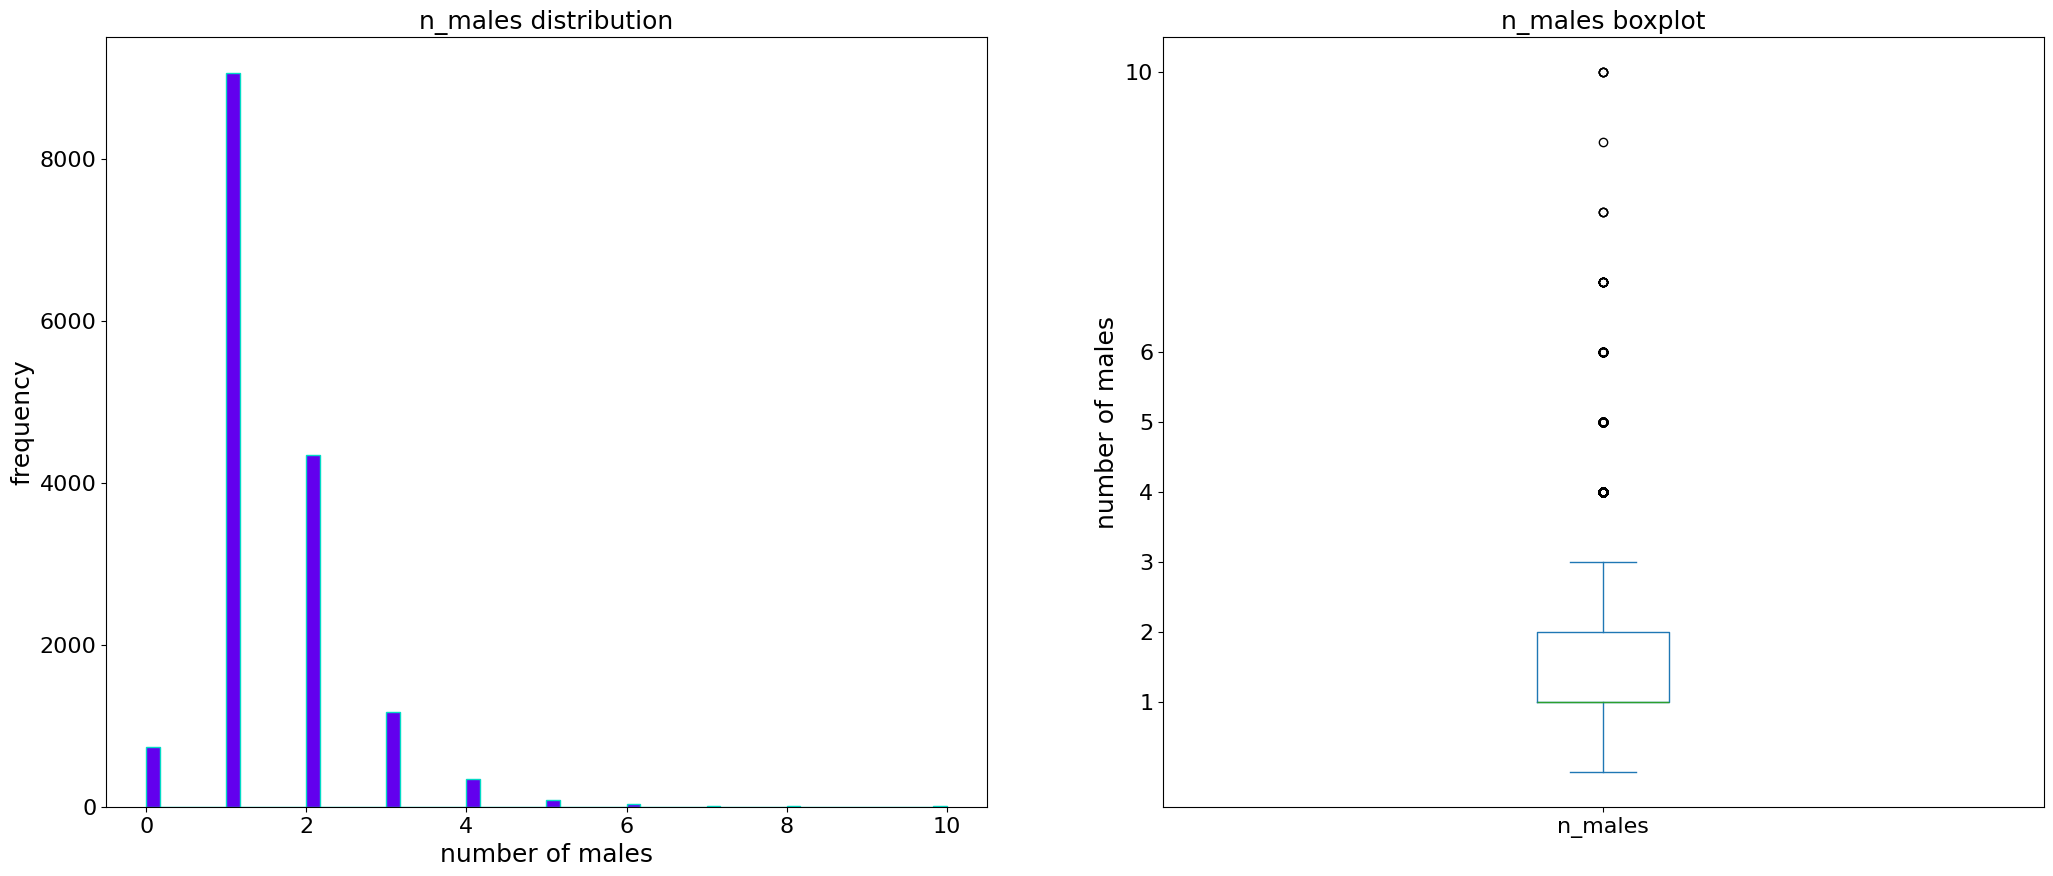

In [34]:
nMales= data["n_males"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nMales.plot(bins= 60,kind="hist",title= "n_males distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of males",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nMales.plot(kind="box",fontsize=16)
ax2.set_title("n_males boxplot")
# ax2.set_yscale("log")
ax2.set_yticks([1,2,3,4,5,6,10])
ax2.set_yticklabels([1,2,3,4,5,6,10])
ax2.set_ylabel("number of males",fontsize=18)
ax2.title.set_size(18)
print(nMales.describe())

plt.show()

 ### n_females
 number of females participants. Non sono presenti valori stringhe.

count    15780.000000
mean         0.142395
std          0.401770
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: n_females, dtype: float64


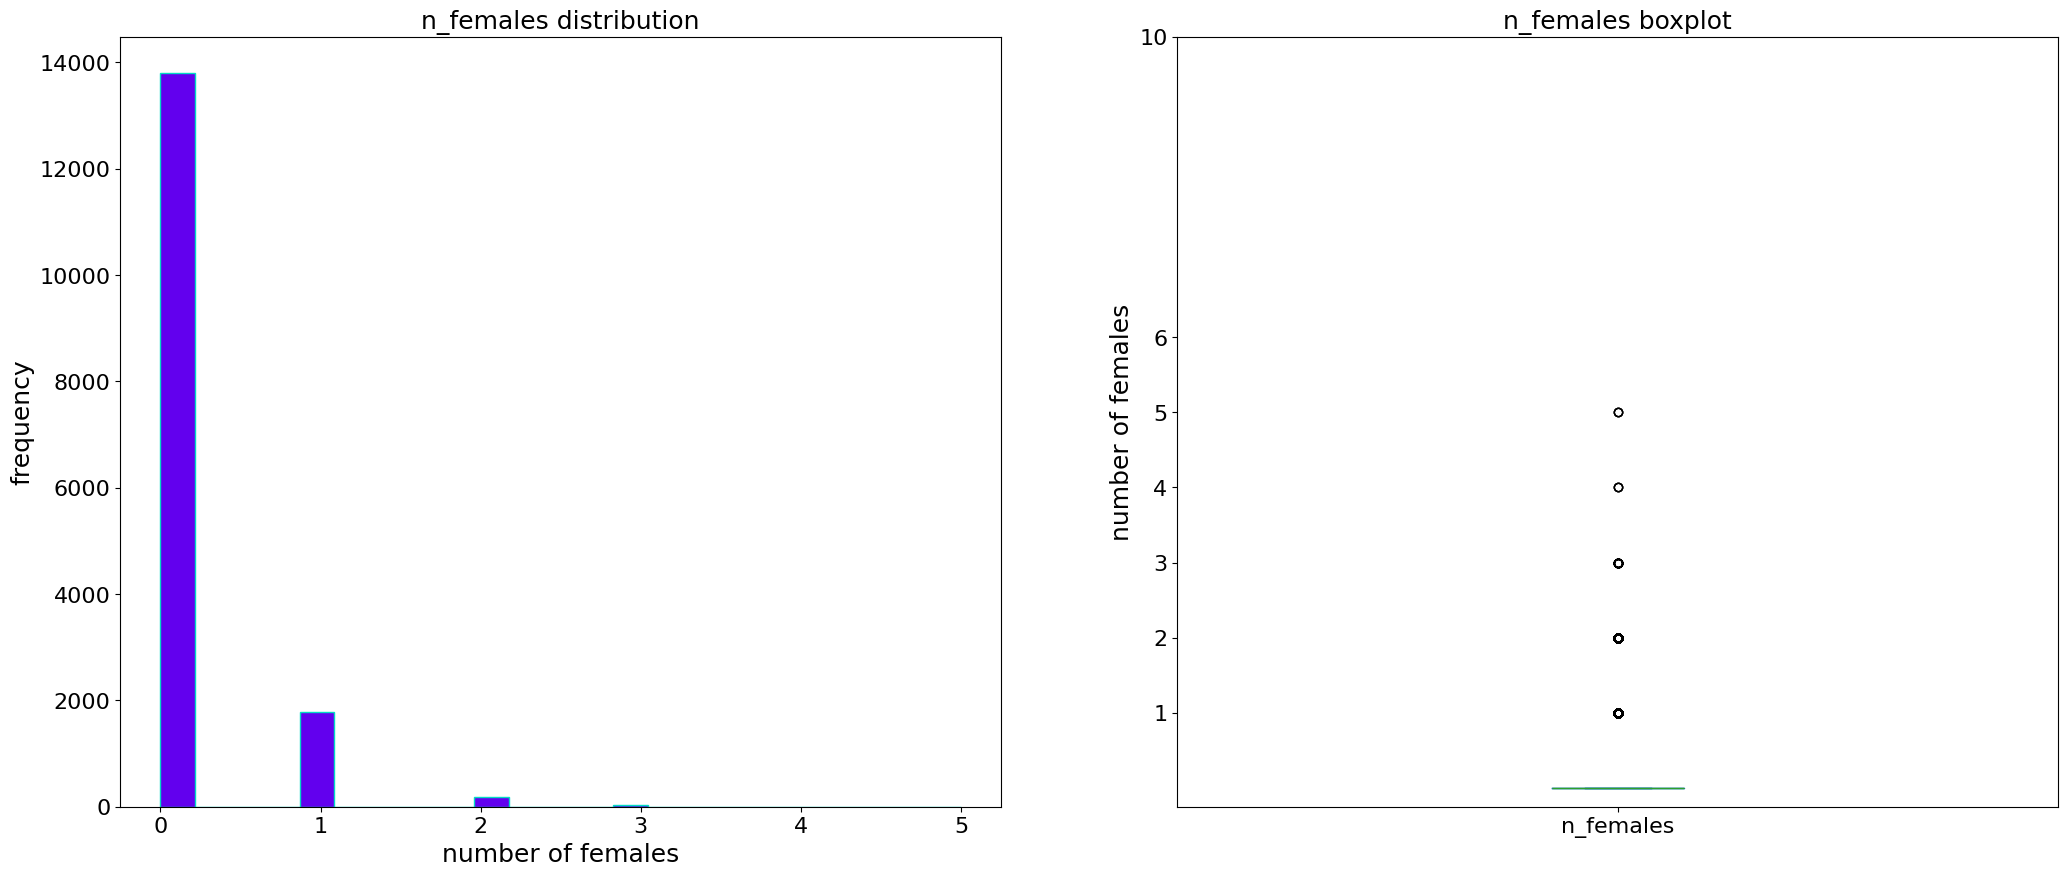

In [35]:
nFemales= data["n_females"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nFemales.plot(bins= 23, kind="hist",title= "n_females distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of females",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nFemales.plot(kind="box",fontsize=16)
ax2.set_title("n_females boxplot")
ax2.set_yticks([1,2,3,4,5,6,10])
ax2.set_yticklabels([1,2,3,4,5,6,10])
ax2.set_ylabel("number of females",fontsize=18)
ax2.title.set_size(18)

print(nFemales.describe())

plt.show()

### n_killed
number of people killed. Non sono presenti stringhe.

count    17555.000000
mean         0.194190
std          0.437048
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          6.000000
Name: n_killed, dtype: float64


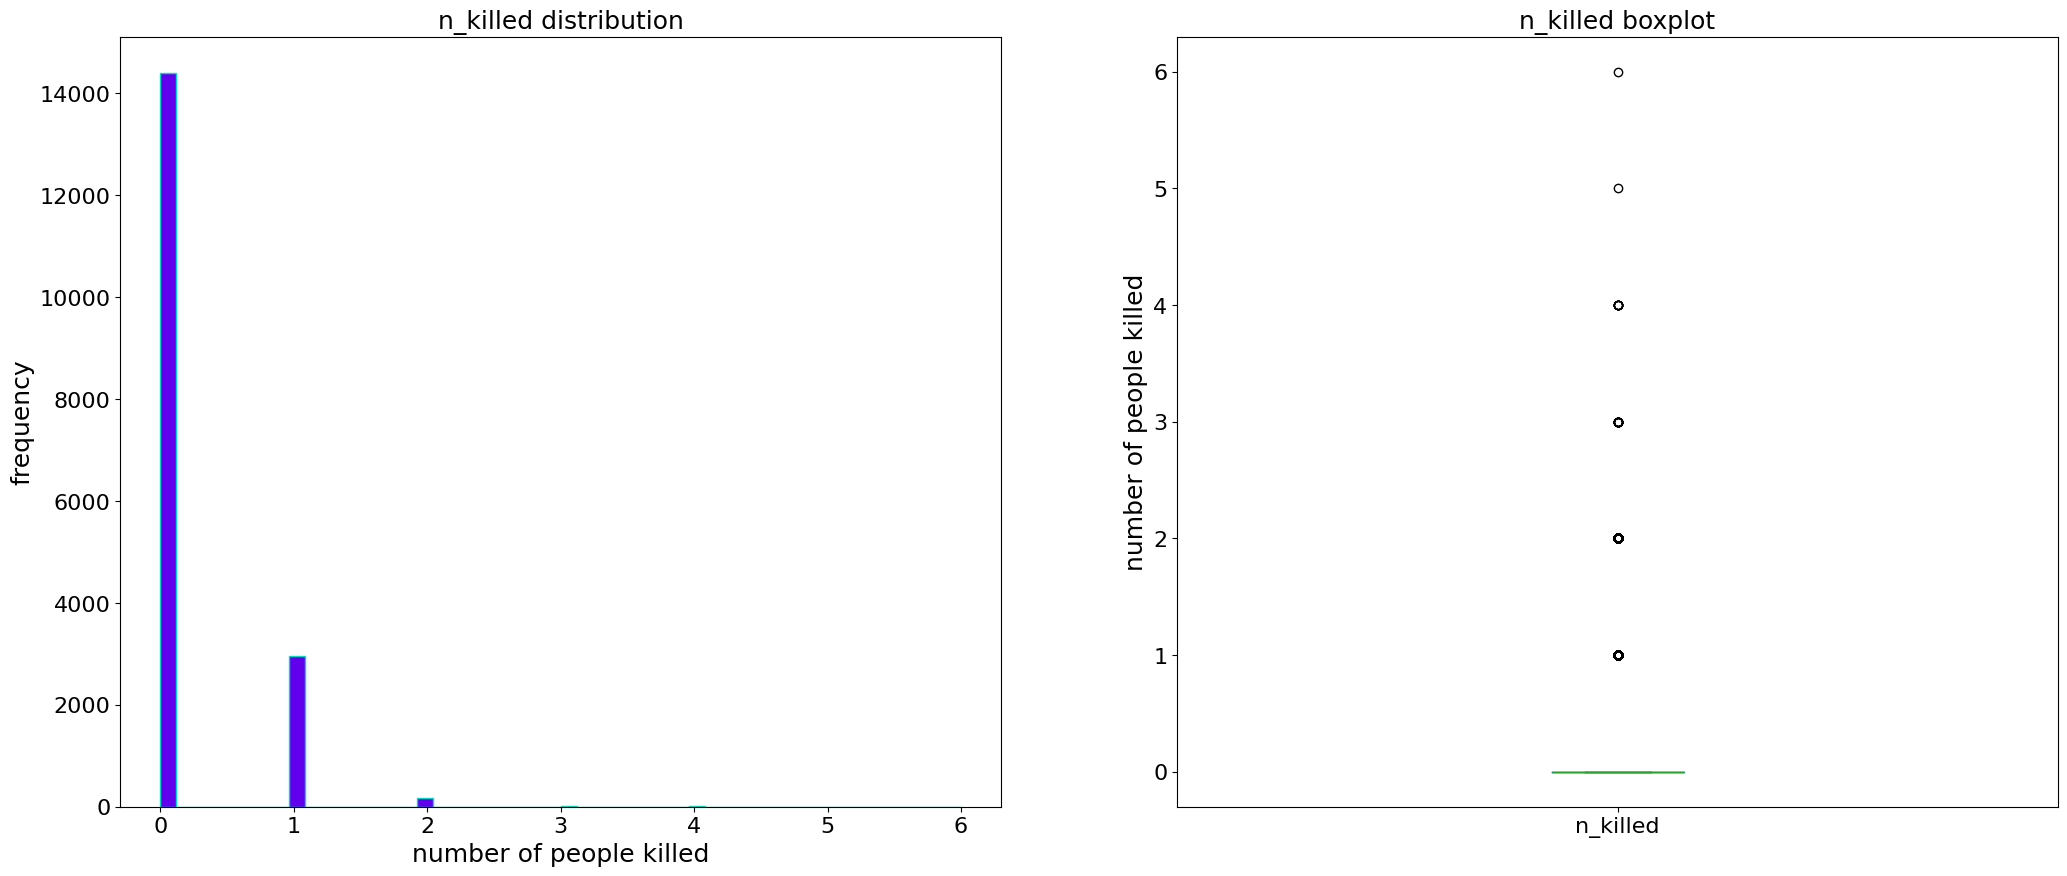

In [36]:
nKilled= data["n_killed"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nKilled.plot(bins=50,kind="hist",title= "n_killed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people killed",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nKilled.plot(kind="box",fontsize=16)
ax2.set_title("n_killed boxplot")

ax2.set_ylabel("number of people killed",fontsize=18)
ax2.title.set_size(18)
print(nKilled.describe())

plt.show()

### n_injured
number of people injured. Sono presenti solo numeri.

count    17555.000000
mean         0.769809
std          0.760360
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max         12.000000
Name: n_injured, dtype: float64


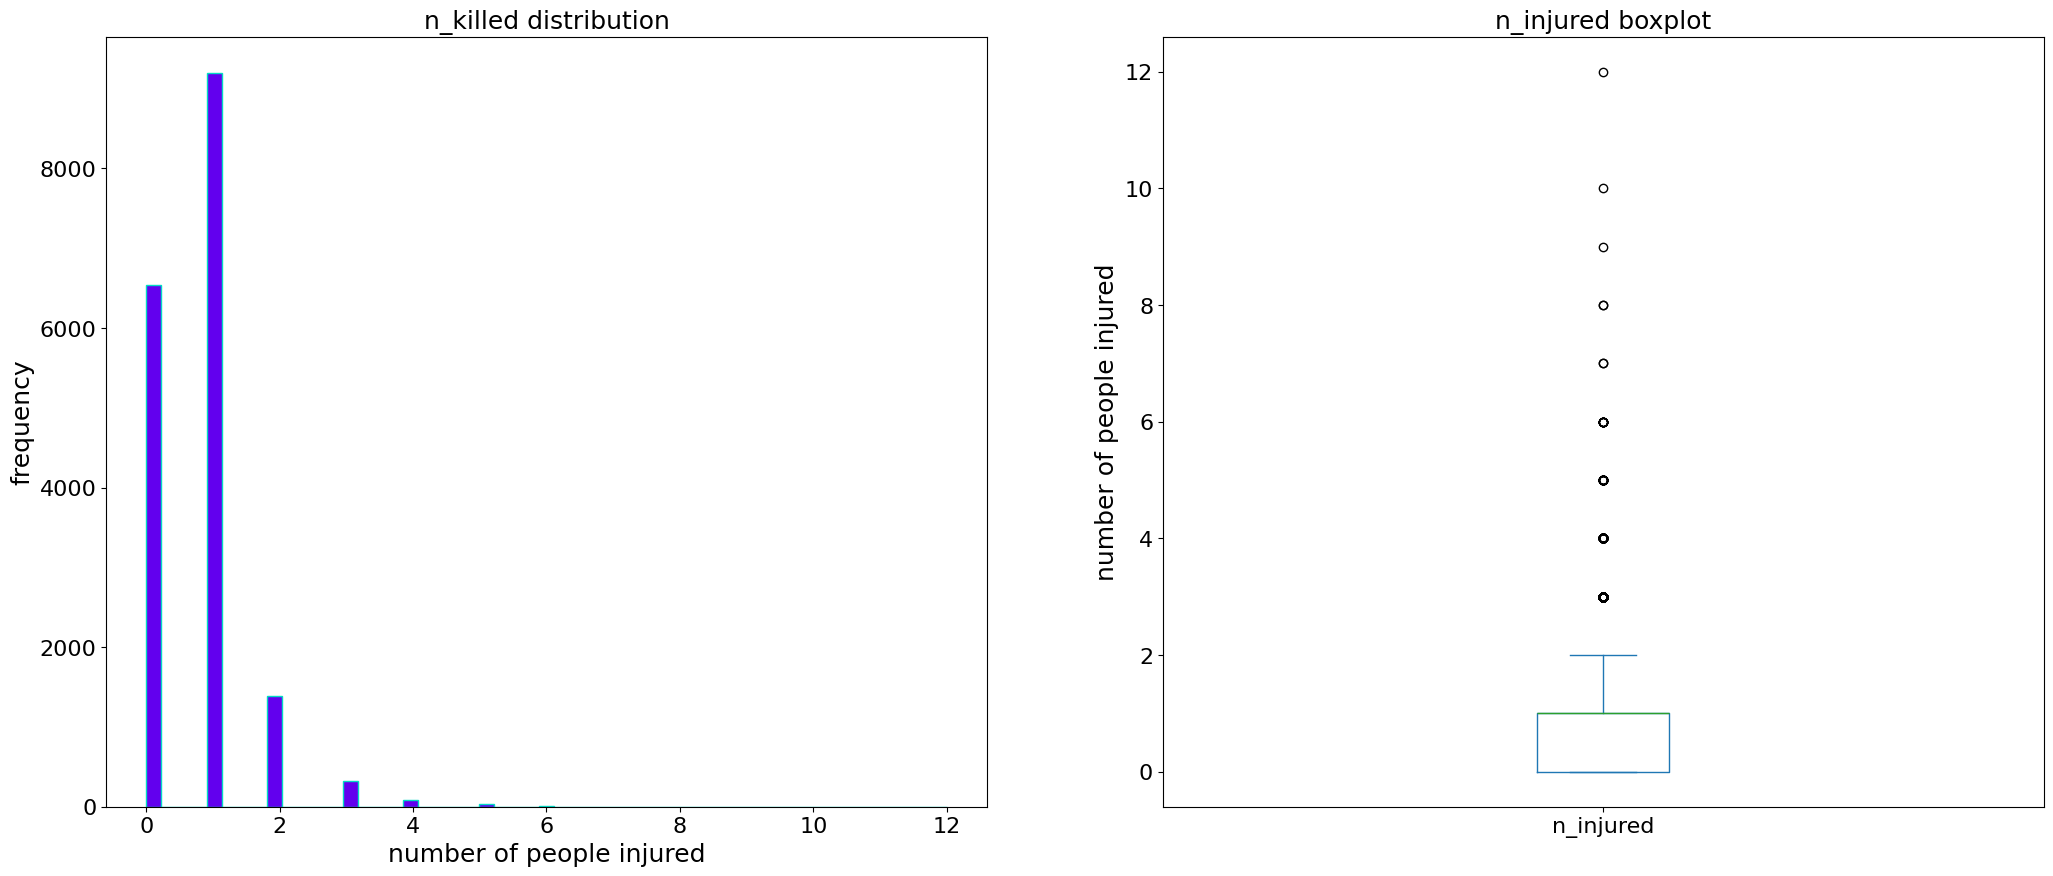

In [37]:
nInjured= data["n_injured"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nInjured.plot(bins=53,kind="hist",title= "n_killed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people injured",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nInjured.plot(kind="box",fontsize=16)
ax2.set_title("n_injured boxplot")
ax2.set_ylabel("number of people injured",fontsize=18)
ax2.title.set_size(18)
print(nInjured.describe())

plt.show()

###  n_arrested
number of arrested participants. Non sono presenti valori stringhe.

count    16242.000000
mean         0.207364
std          0.544074
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: n_arrested, dtype: float64


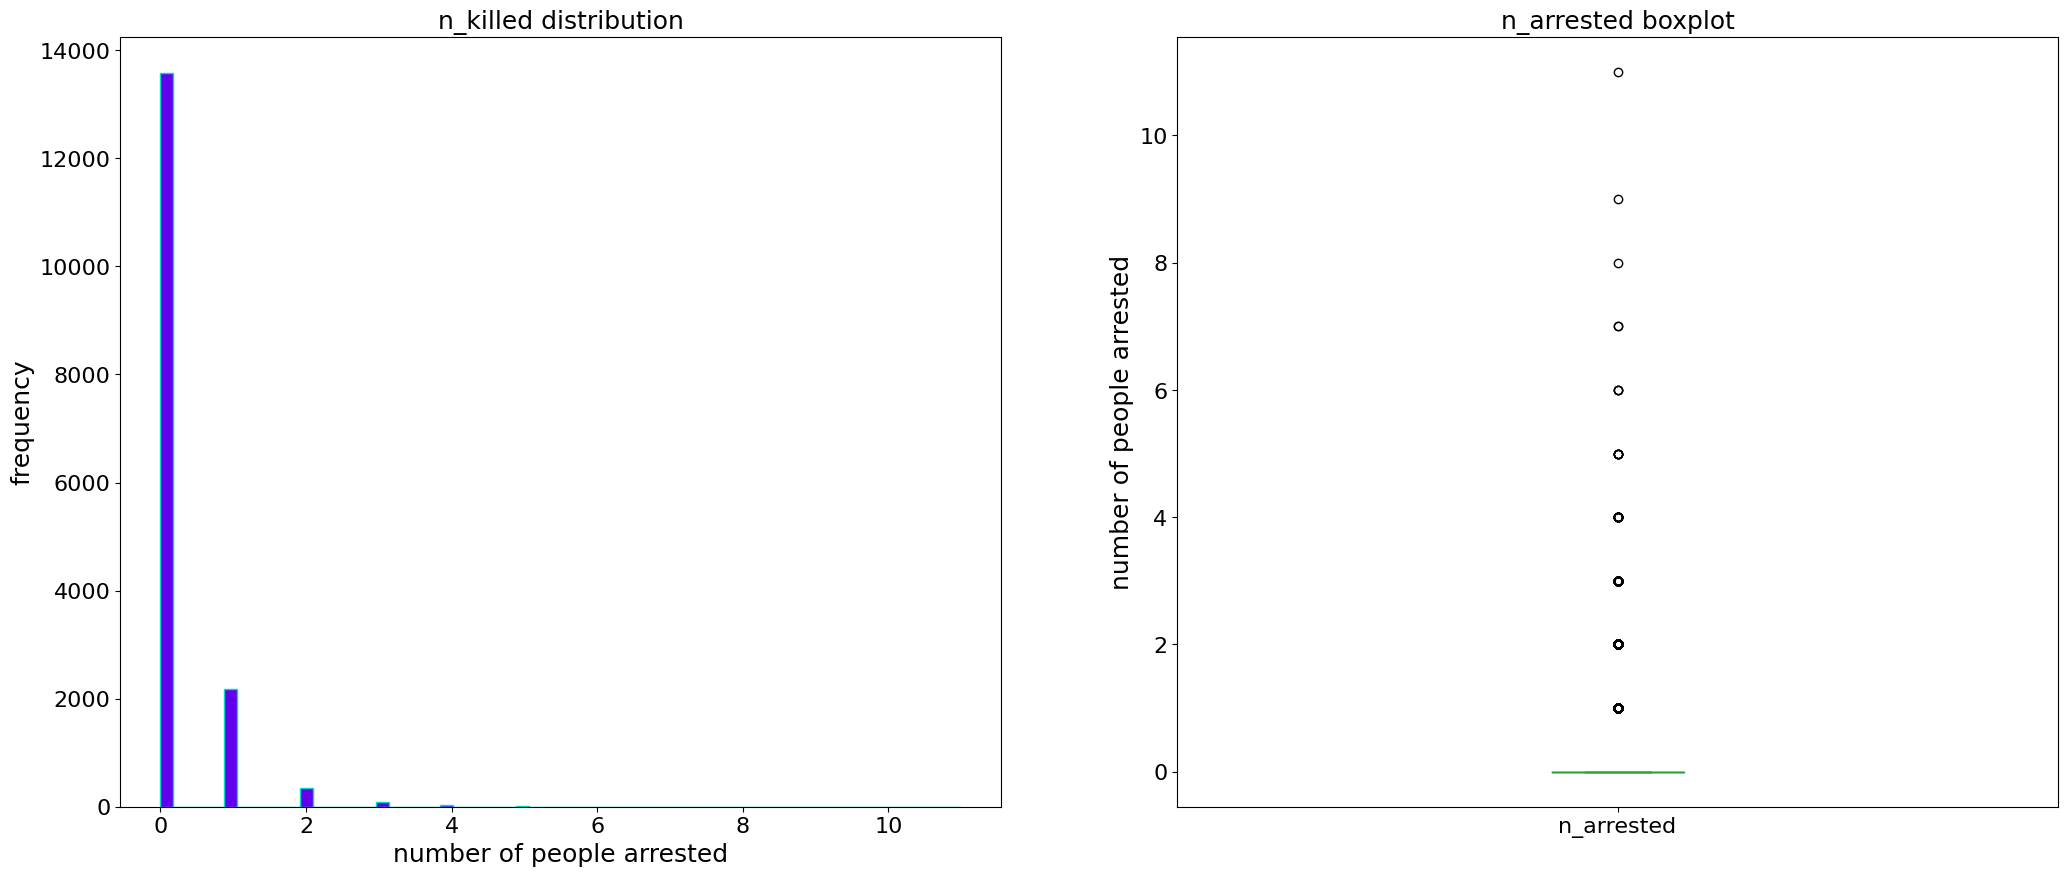

In [38]:
nArrested= data["n_arrested"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nArrested.plot(bins=63,kind="hist",title= "n_killed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people arrested",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nArrested.plot(kind="box",fontsize=16)
ax2.set_title("n_arrested boxplot")
ax2.set_ylabel("number of people arrested",fontsize=18)
ax2.title.set_size(18)
print(nArrested.describe())

plt.show()

### n_unharmed
number of unharmed participants. Non sono presenti valori string.

count    16242.000000
mean         0.426117
std          0.746060
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: n_unharmed, dtype: float64


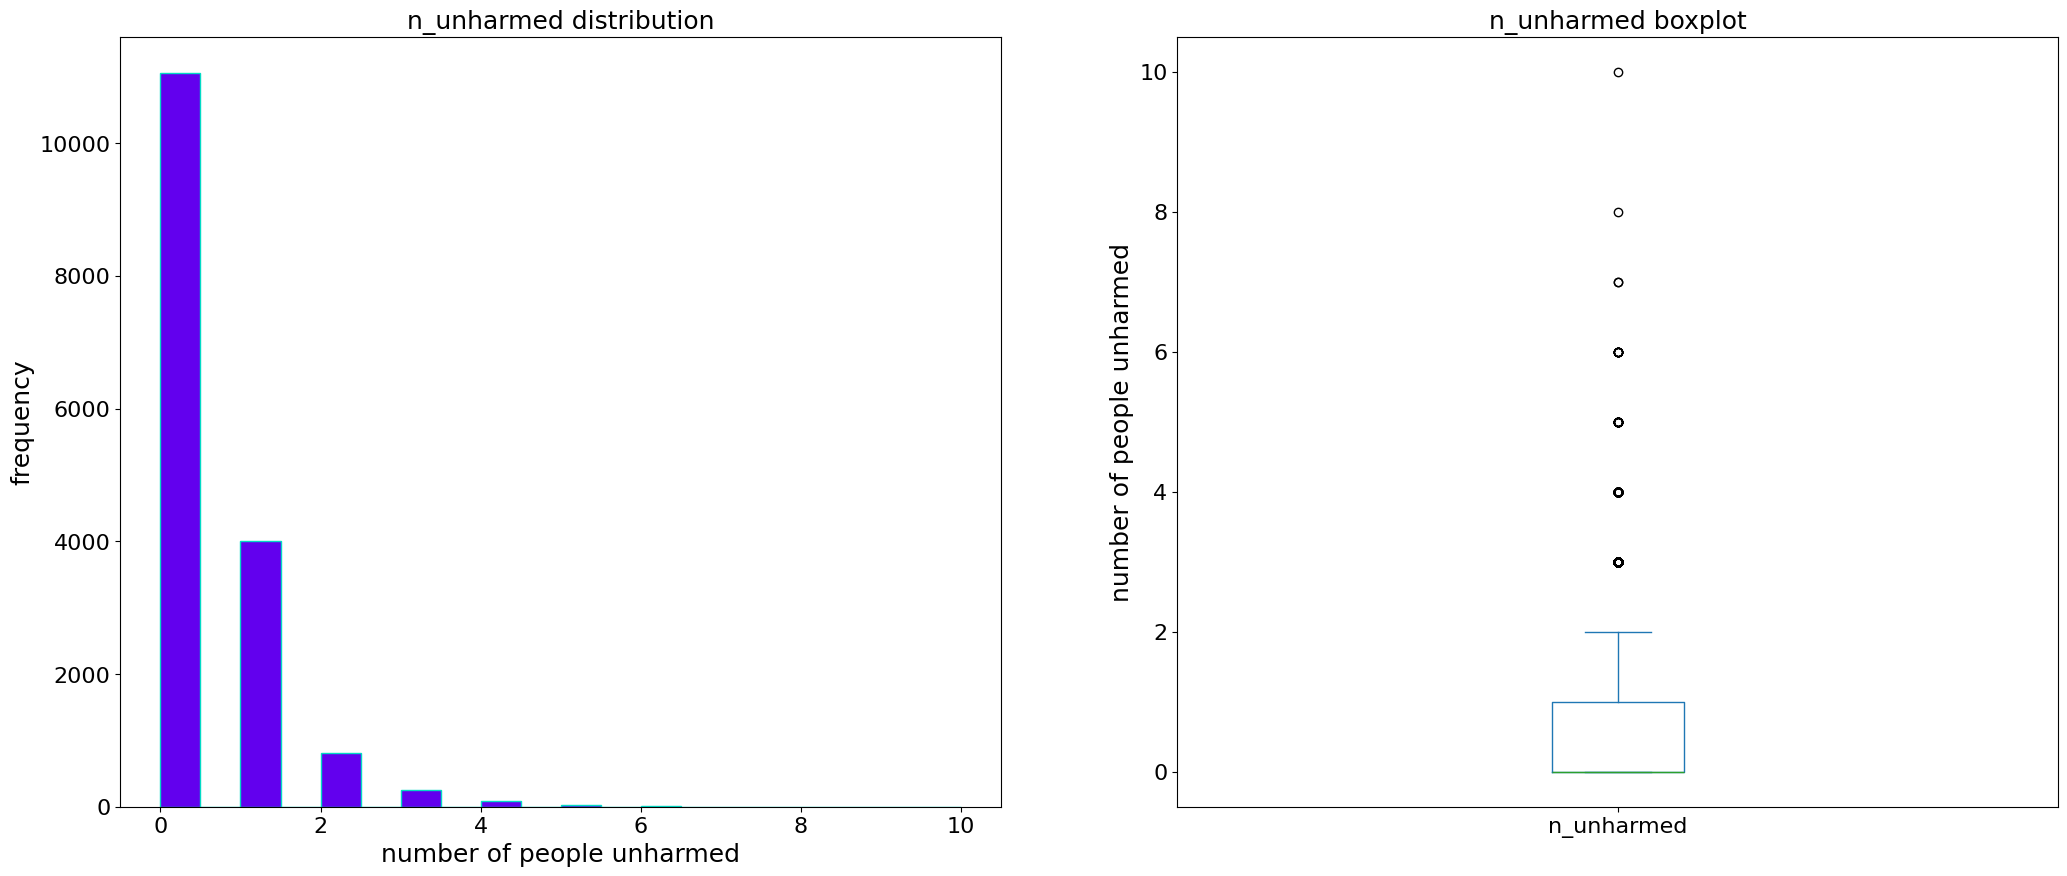

In [39]:
nUnharmed= data["n_unharmed"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nUnharmed.plot(bins=20,kind="hist",title= "n_unharmed distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people unharmed",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nUnharmed.plot(kind="box",fontsize=16)
ax2.set_title("n_unharmed boxplot")
ax2.set_ylabel("number of people unharmed",fontsize=18)
ax2.title.set_size(18)
print(nUnharmed.describe())

plt.show()

### n_participants
number of participants in the incident. Non sono presenti valori string.

count    14050.000000
mean         1.357295
std          0.902397
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: n_participants, dtype: float64


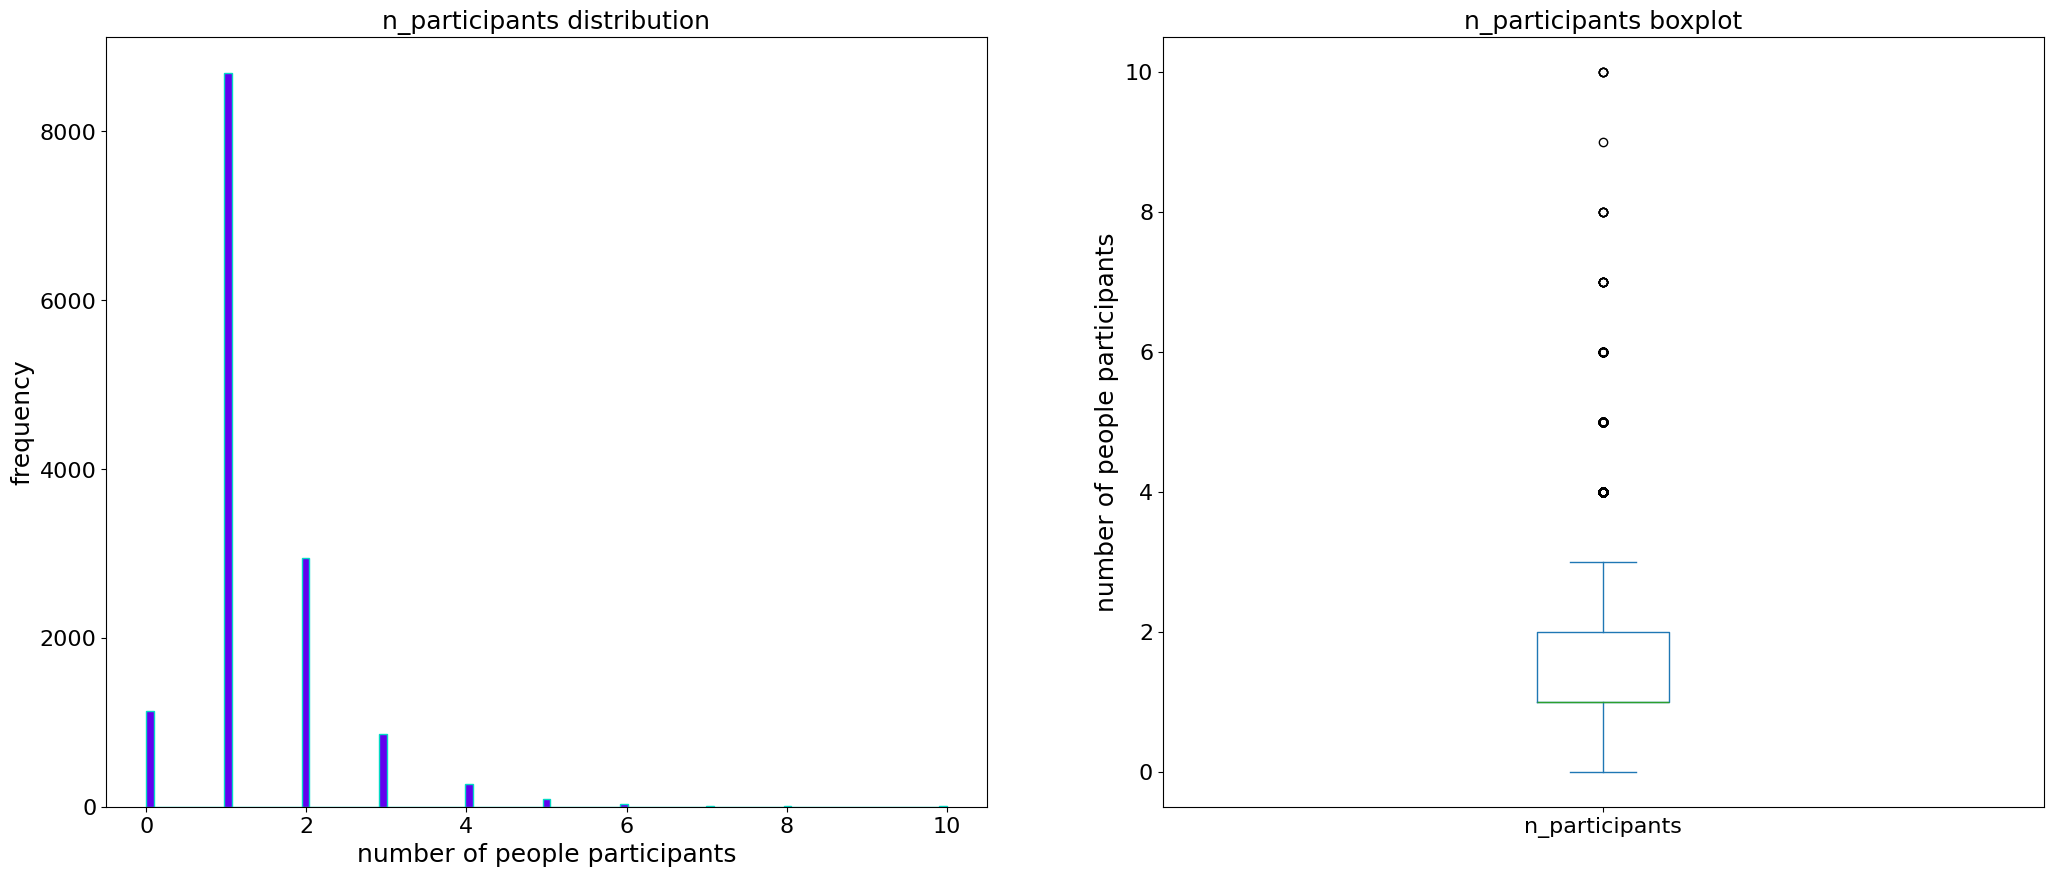

In [40]:
nParticipants= data["n_participants"]

dim = (1,2)
plt.figure(figsize=(25,10))

plt.subplot2grid(dim,(0,0))
ax=nParticipants.plot(bins=103,kind="hist",title= "n_participants distribution", 
                              color=color,edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_yscale("log")
ax.set_ylabel("frequency",fontsize=18)
ax.set_xlabel("number of people participants",fontsize=18)
plt.subplot2grid(dim,(0,1))

ax2=nParticipants.plot(kind="box",fontsize=16)
ax2.set_title("n_participants boxplot")
ax2.set_ylabel("number of people participants",fontsize=18)
ax2.title.set_size(18)
print(nParticipants.describe())

plt.show()

### incidents characteristic1 e 2
dato categorico. Incidents caracteristc2 è stato analizzato ma i dati più frequenti non sono ritenuti interessanti ai fini dell'analisi quindi l'attributo viene droppato.

Text(0.5, 0, 'incident characteristic')

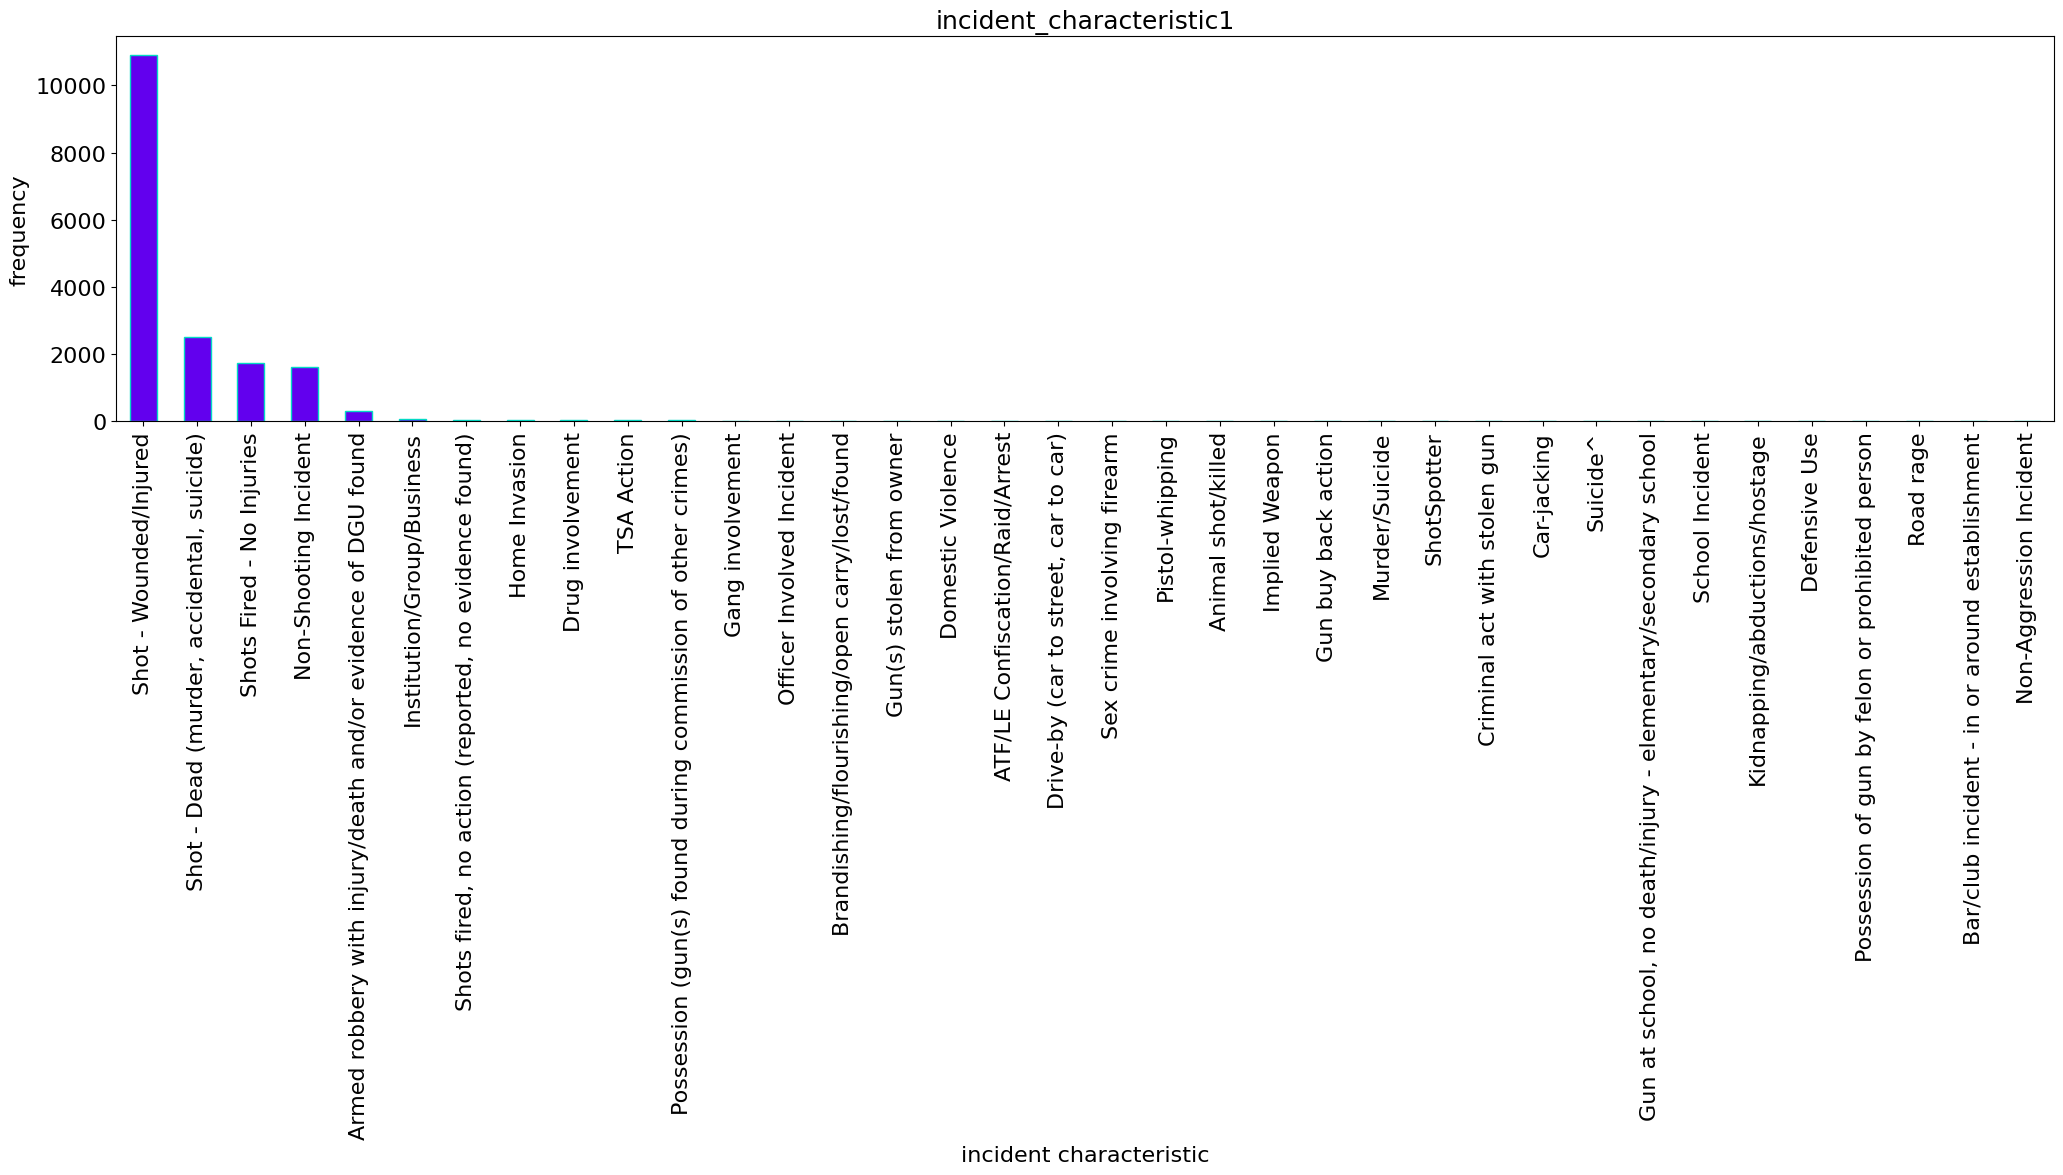

In [43]:
inc1=data["incident_characteristics1"].value_counts()
plt.figure(figsize=(25,5))
ax=inc1.plot(kind="bar",title="incident_characteristic1", color=color, edgecolor=edgecolor,fontsize=16)
ax.title.set_size(18)
ax.set_ylabel("frequency",fontsize= 16)
ax.set_xlabel("incident characteristic",fontsize=16)
ax.set_yscale("log")